In [ ]:
# Import Library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from scipy.stats import uniform
import xgboost as xgb

# 1. DATA UNDERSTANDING



In [ ]:
# Membaca csv dataset
df = pd.read_csv('/content/drive/MyDrive/Colab/loan_data_2007_2014.csv')

# Melihat 5 baris pertama dataset
print('\nBerikut tabel data: ')
print(df.head(100))

# Melihat dimensi data
print('\nDimensi data: ')
print(df.shape)

# Melihat nama kolom
print('\nNama kolom: ')
print(df.columns)


/tmp/ipython-input-3946521722.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab/loan_data_2007_2014.csv')



Berikut tabel data: 
    Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0            0  1077501    1296599       5000         5000           4975.0   
1            1  1077430    1314167       2500         2500           2500.0   
2            2  1077175    1313524       2400         2400           2400.0   
3            3  1076863    1277178      10000        10000          10000.0   
4            4  1075358    1311748       3000         3000           3000.0   
..         ...      ...        ...        ...          ...              ...   
95          95  1068575    1303001      15300        15300          15275.0   
96          96  1049528    1280928      20000        12800          12775.0   
97          97  1068542    1303143      17500        17500          17500.0   
98          98  1068350    1302971       3500         3500           3500.0   
99          99  1067874    1302235       6000         6000           6000.0   

          term  int_rate  ins

In [ ]:
# Melihat info data
print('\nBerikut info data: ')
print(df.info())

# Melihat jenis tipe data setiap kolom
print('\nBerikut jenis tipe data setiap kolom: ')
print(df.dtypes)
print('\nJumlah setiap tipe data:\n',df.dtypes.value_counts())



Berikut info data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 n

MELIHAT MISSING VALUE
===

In [ ]:
# Cek missing value
df_mv = df.isna().sum()
print('\nApakah ada missing value ?')
if df_mv.sum() == 0:
    print('Tidak ada missing value')
else:
    print('Ada missing value sebanyak', df_mv.sum())
    print('\nAdapun sebagai berikut:\n', df_mv)
#
# Cek kolom yang mengandung missing value
col_null = df.columns[df.isna().any()]
print('\nKolom yang memiliki missing value: ')
print(col_null)
print('Jumlah kolom yang memiliki missing value:', len(col_null))
#
# Cek kolom yang mengandung missing value 100%, lebih dari 75%, lebih dari 50% dari total baris
#
#
# Cek kolom yang mengandung missing value 100% dari baris
col_null_100_percent = df.columns[df.isna().sum() == 1.0 * len(df)]
print('\nKolom yang memiliki missing value 100%: ')
print(col_null_100_percent)
print('Jumlah kolom yang memiliki missing value 100%: ', len(col_null_100_percent))
#
# Cek kolom yang mengandung missing value lebih dari 75% baris
col_null_75_percent = df.columns[df.isna().sum() > 0.75 * len(df)]
print('Jumlah kolom yang memiliki missing value lebih dari 75%: ', len(col_null_75_percent))
#
# Cek kolom yang mengandung missing value lebih dari 50% baris
col_null_50_percent = df.columns[df.isna().sum() >= 0.50 * len(df)]
print('\nKolom yang memiliki missing value lebih dari 50%: ')
print(col_null_50_percent)
print('Jumlah kolom yang memiliki missing value lebih dari 50%: ', len(col_null_50_percent))
# ================================================================


Apakah ada missing value ?
Ada missing value sebanyak 9776227

Adapun sebagai berikut:
 Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

Kolom yang memiliki missing value: 
Index(['emp_title', 'emp_length', 'annual_inc', 'desc', 'title', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_util',
       'total_acc', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_il_6m', 'open_il_12m', 'open_il_24m'

CEK DUPLIKAT
===

In [ ]:
# Cek duplikat
df_dup = df.duplicated().sum()
print('\nApakah ada data duplikat ?')
if df_dup == 0:
    print('Tidak ada data duplikat')
else:
    print('Ada data duplikat sejumlah', df_dup.sum())
# ====================================================


Apakah ada data duplikat ?
Tidak ada data duplikat


CEK KONSISTENSI DATA
===

In [ ]:
# Cek konsistensi data - menampilkan nilai unik untuk seluruh kolom
for col in df.columns:
    grouped_df = df.groupby([col])[col].count()
    print(f"\nGrouped data for column '{col}':\n")
    print(grouped_df)
    print("-" * 30) # Separator for better readability
# ===================================================


Grouped data for column 'Unnamed: 0':

Unnamed: 0
0         1
1         1
2         1
3         1
4         1
         ..
466280    1
466281    1
466282    1
466283    1
466284    1
Name: Unnamed: 0, Length: 466285, dtype: int64
------------------------------

Grouped data for column 'id':

id
54734       1
55521       1
55742       1
56413       1
57167       1
           ..
37854137    1
37854157    1
37854423    1
37854444    1
38098114    1
Name: id, Length: 466285, dtype: int64
------------------------------

Grouped data for column 'member_id':

member_id
70473       1
70626       1
70651       1
70681       1
70694       1
           ..
40616855    1
40616878    1
40617173    1
40617199    1
40860827    1
Name: member_id, Length: 466285, dtype: int64
------------------------------

Grouped data for column 'loan_amnt':

loan_amnt
500         11
550          1
600          6
700          3
725          1
         ...  
34900        5
34925        2
34950        2
34975       15
3

DETEKSI OUTLIER
===


Deteksi Outlier pada kolom atau fitur yang akan digunakan:


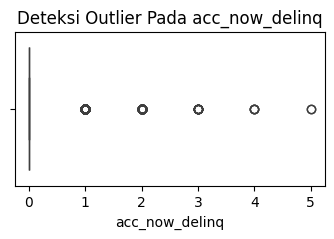

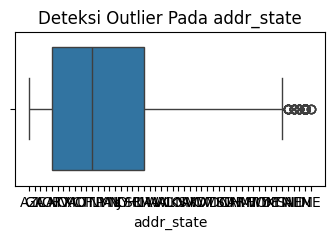

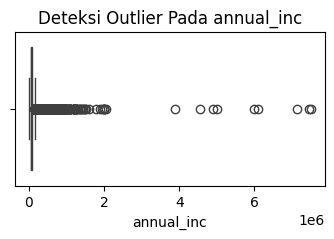

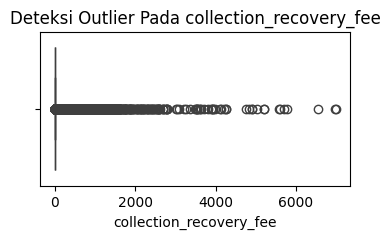

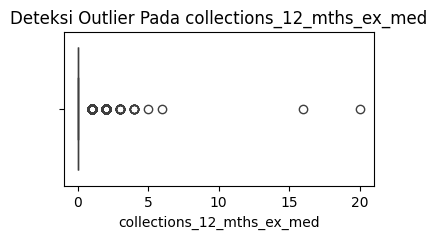

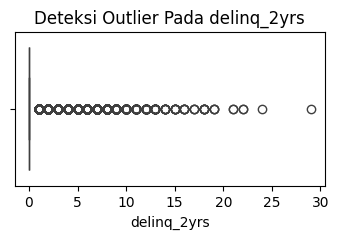

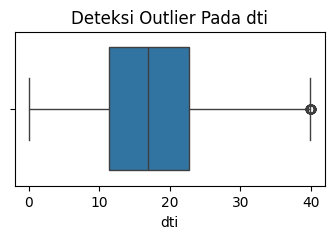

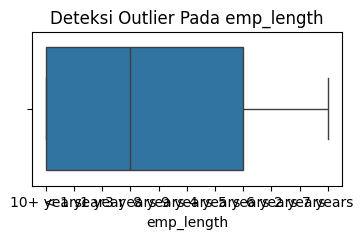

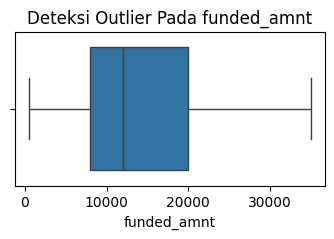

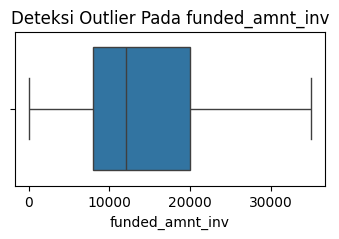

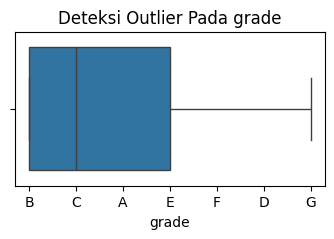

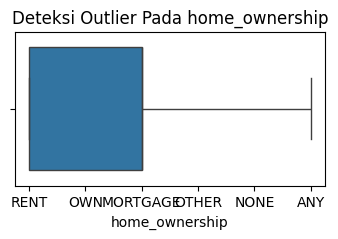

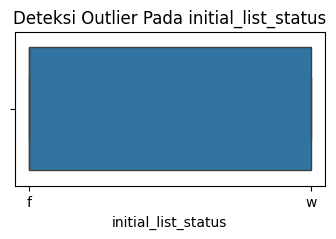

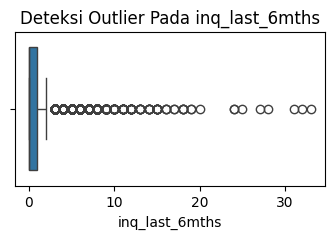

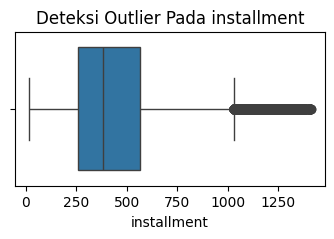

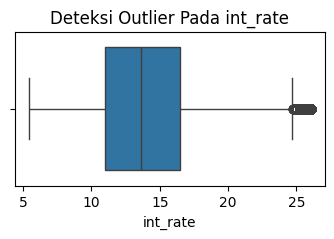

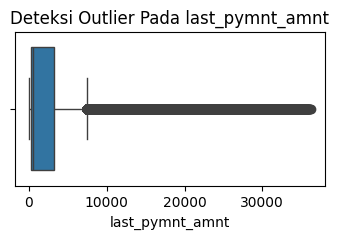

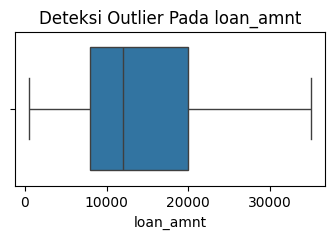

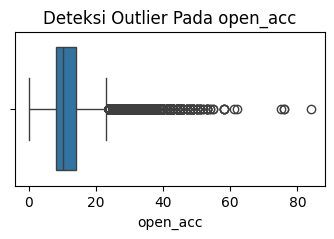

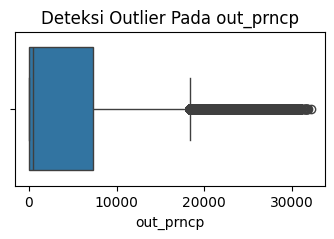

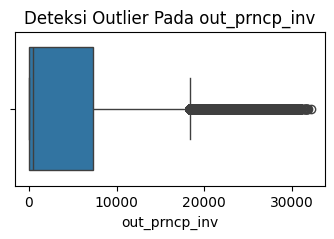

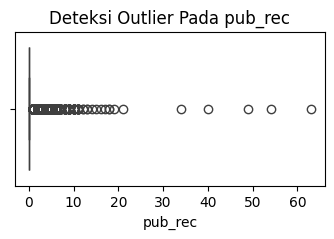

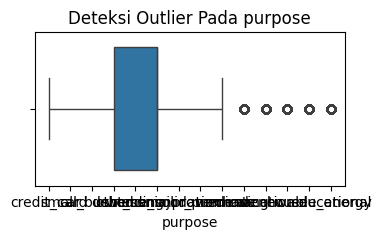

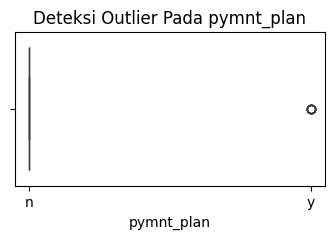

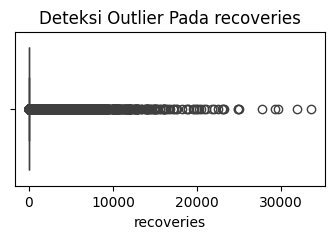

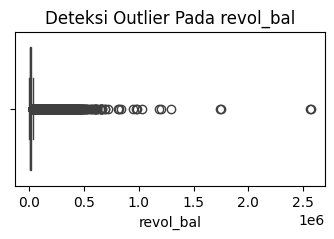

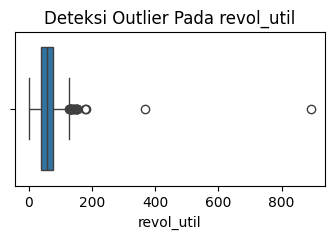

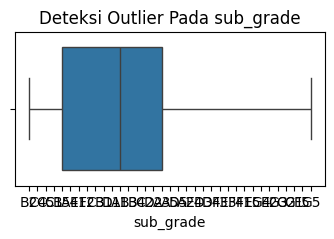

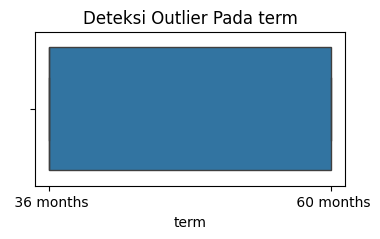

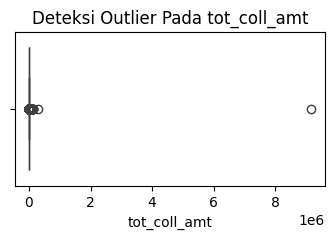

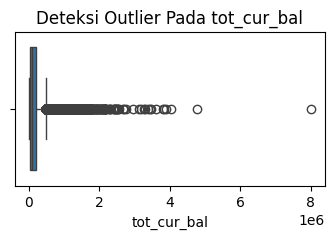

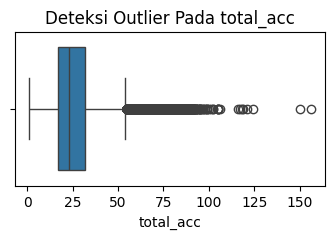

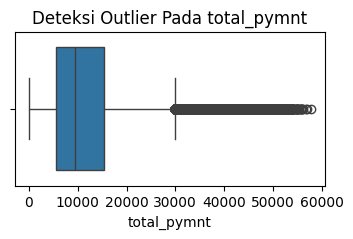

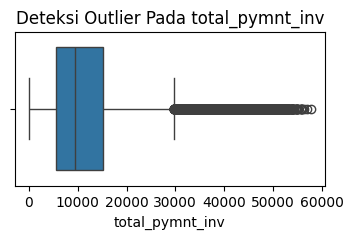

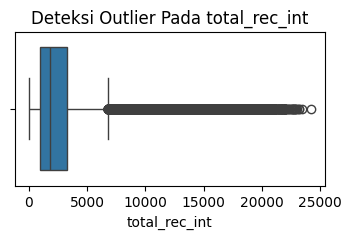

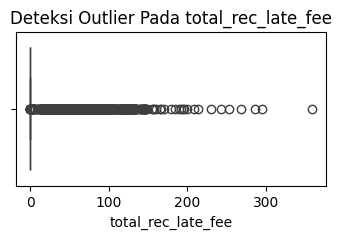

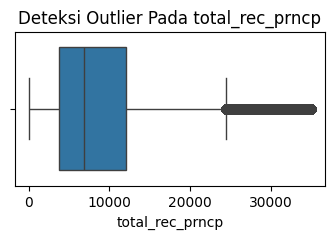

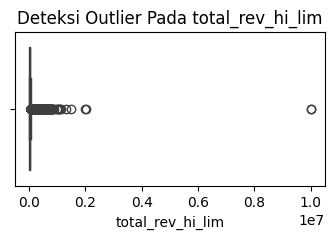

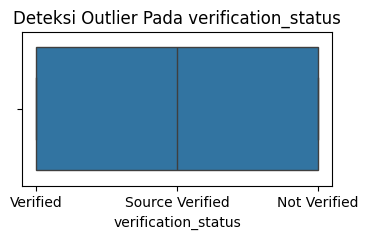


Outlier pada kolom Unnamed: 0:
Empty DataFrame
Columns: [Unnamed: 0, id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv

In [ ]:
# Deteksi Outlier menggunakan boxplot
print('\nDeteksi Outlier pada kolom atau fitur yang akan digunakan:')
for col_used in ['acc_now_delinq', 'addr_state', 'annual_inc', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'delinq_2yrs', 'dti', 'emp_length',
       'funded_amnt', 'funded_amnt_inv', 'grade', 'home_ownership',
       'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate',
       'last_pymnt_amnt', 'loan_amnt', 'open_acc', 'out_prncp',
       'out_prncp_inv', 'pub_rec', 'purpose', 'pymnt_plan', 'recoveries',
       'revol_bal', 'revol_util', 'sub_grade', 'term', 'tot_coll_amt',
       'tot_cur_bal', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp',
       'total_rev_hi_lim', 'verification_status']:
      plt.figure(figsize=(4, 2))
      sns.boxplot(x=df[col_used])
      plt.title(f"Deteksi Outlier Pada {col_used}")
      plt.show()

# Identifikasi Outlier menggunakan (IQR)
for col_used in df.columns[:-1]:  # Fitur numerik
    # Cek apakah kolom bertipe data numerik sebelumn melakukan perhitungan
    if pd.api.types.is_numeric_dtype(df[col_used]):
        Q1 = df[col_used].quantile(0.25)
        Q3 = df[col_used].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col_used] < lower_bound) | (df[col_used] > upper_bound)]
        print(f"\nOutlier pada kolom {col_used}:")
        print(outliers)
    else:
        print(f"\nKolom '{col_used}' dilewati (bukan tipe numerik).")

STATISTIK DESKRIPTIF
===

In [ ]:
# Melihat statistik deskriptif untuk seluruh kolom yang tidak memiliki missing value lebih dari 50% dari total baris
not_null_columns = df.columns[df.notnull().sum() > 0.5 * len(df)] # notnull berarti tidak mengandung missing value
df_sd = df[not_null_columns].describe()
print('Berikut statistik data: \n')
print(df_sd)
# ==============================================================

Berikut statistik data: 

          Unnamed: 0            id     member_id      loan_amnt  \
count  466285.000000  4.662850e+05  4.662850e+05  466285.000000   
mean   233142.000000  1.307973e+07  1.459766e+07   14317.277577   
std    134605.029472  1.089371e+07  1.168237e+07    8286.509164   
min         0.000000  5.473400e+04  7.047300e+04     500.000000   
25%    116571.000000  3.639987e+06  4.379705e+06    8000.000000   
50%    233142.000000  1.010790e+07  1.194108e+07   12000.000000   
75%    349713.000000  2.073121e+07  2.300154e+07   20000.000000   
max    466284.000000  3.809811e+07  4.086083e+07   35000.000000   

         funded_amnt  funded_amnt_inv       int_rate    installment  \
count  466285.000000    466285.000000  466285.000000  466285.000000   
mean    14291.801044     14222.329888      13.829236     432.061201   
std      8274.371300      8297.637788       4.357587     243.485550   
min       500.000000         0.000000       5.420000      15.670000   
25%      8000.0

EDA (Exploratory Data Analysis)
===

/tmp/ipython-input-2516807514.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('/content/drive/MyDrive/Colab/loan_data_2007_2014.csv')


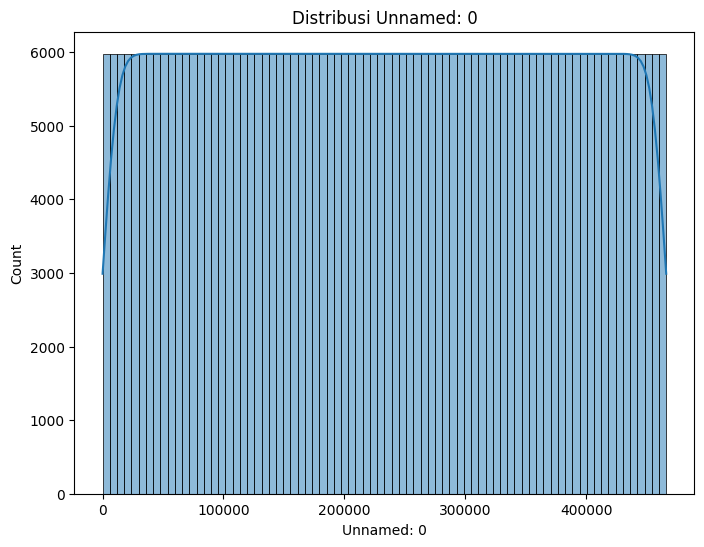

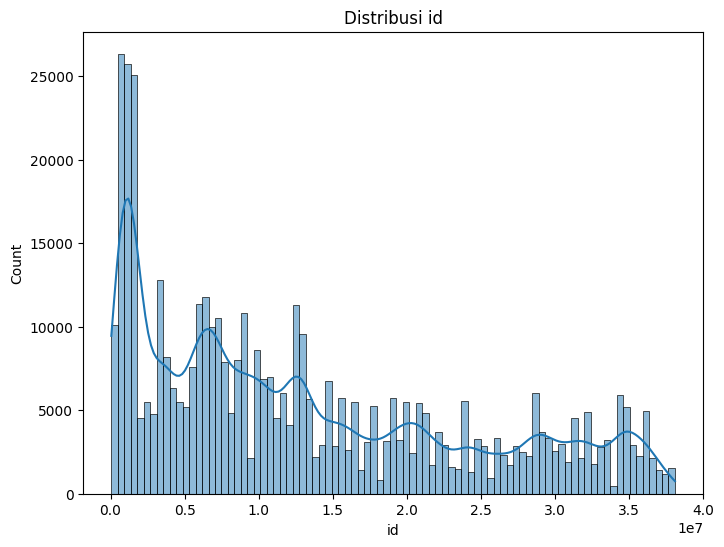

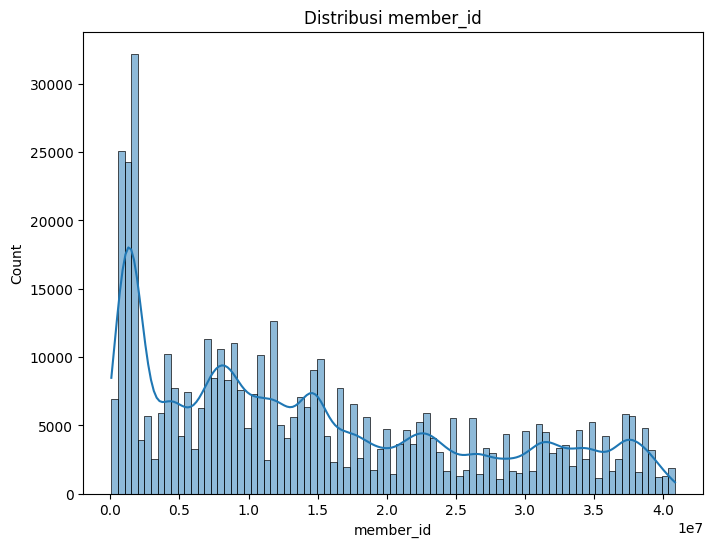

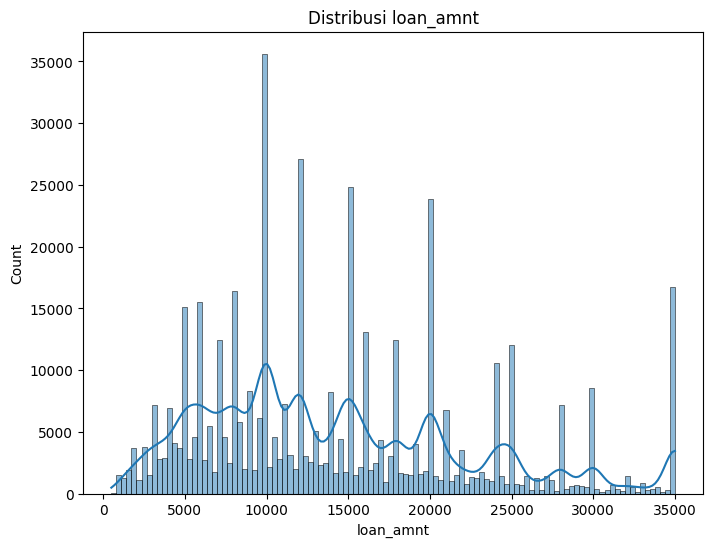

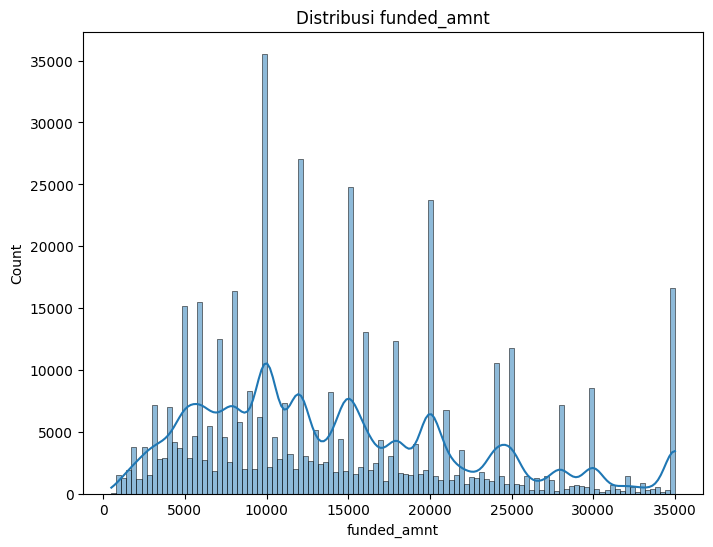

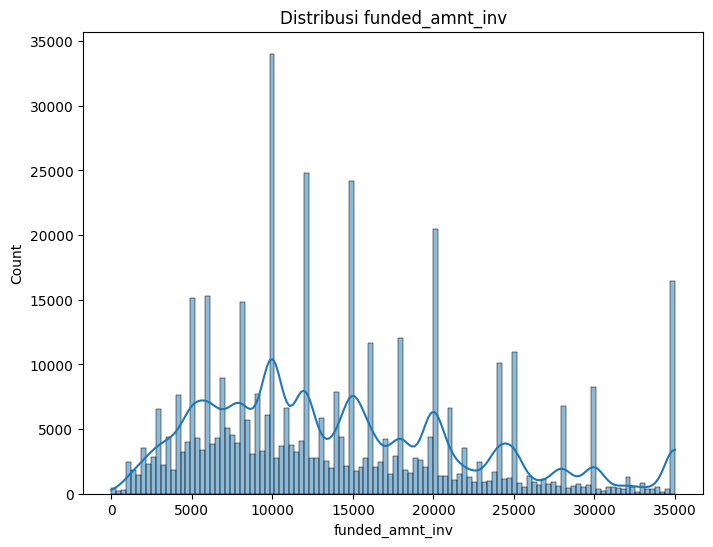

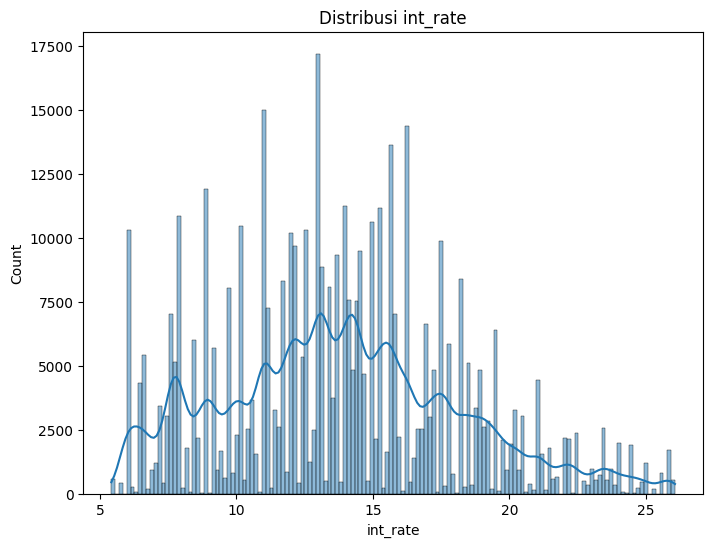

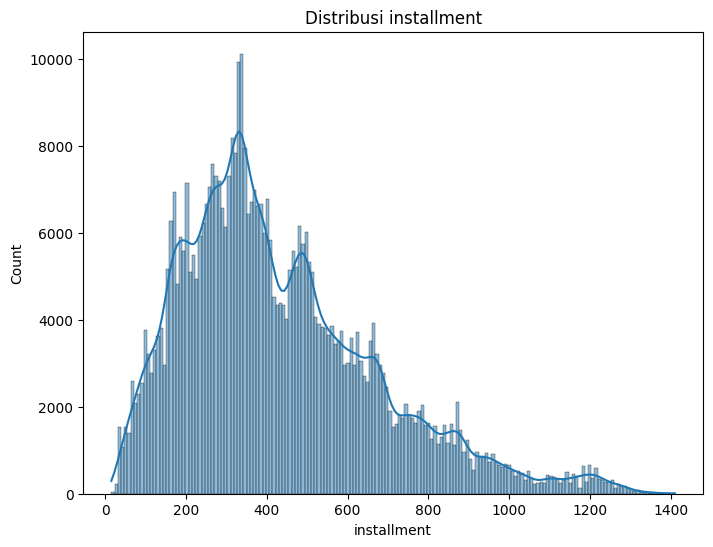

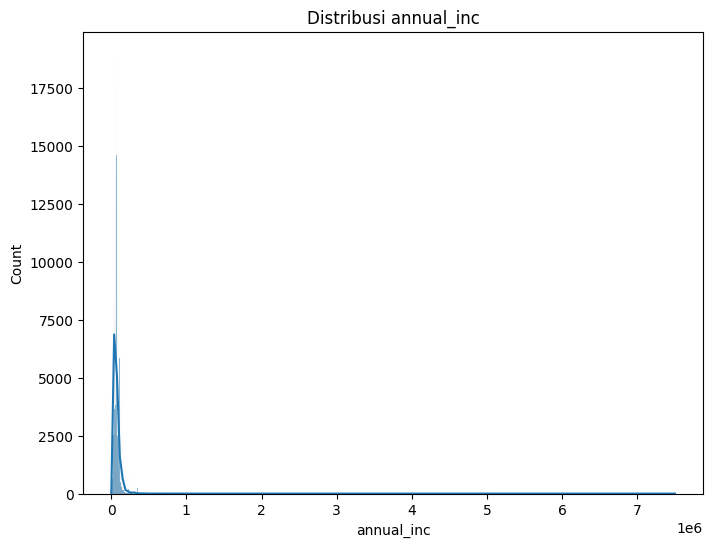

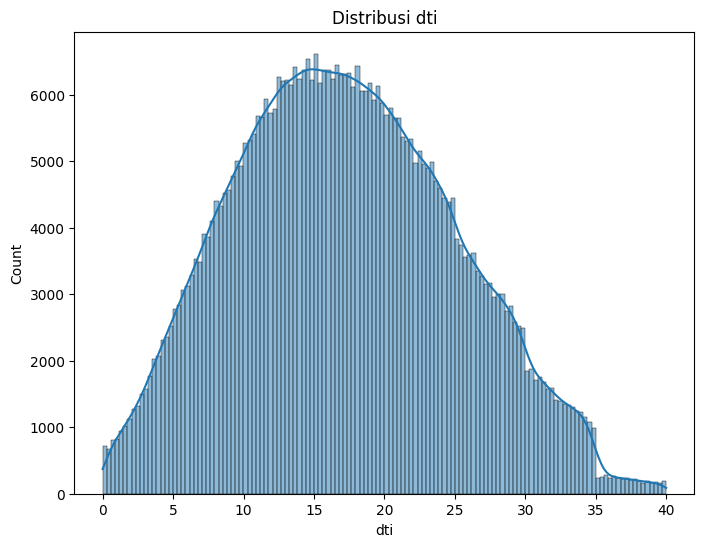

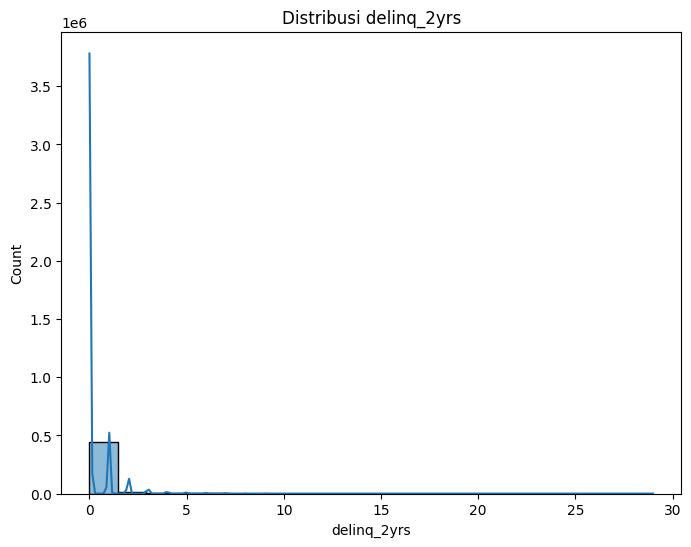

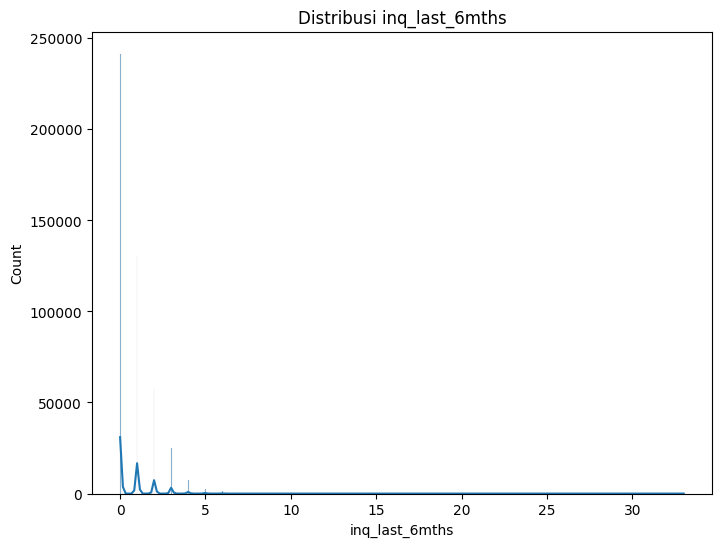

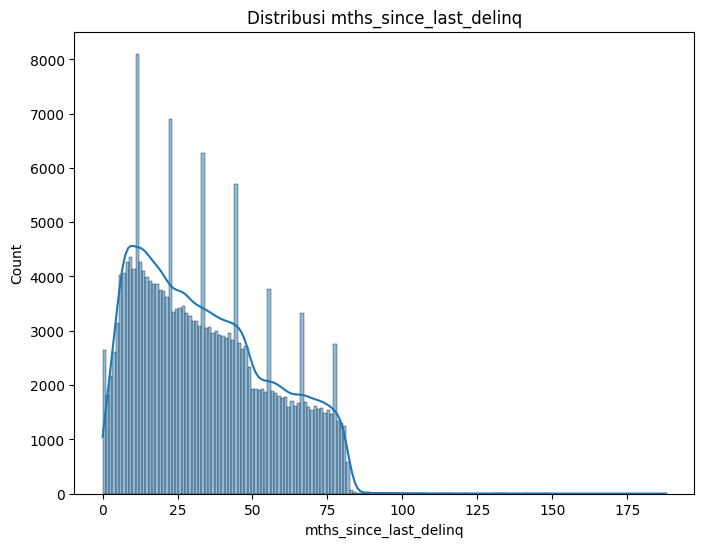

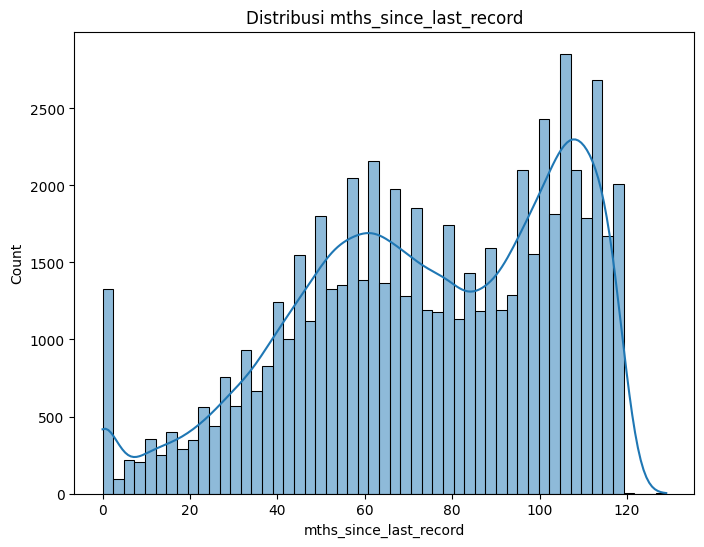

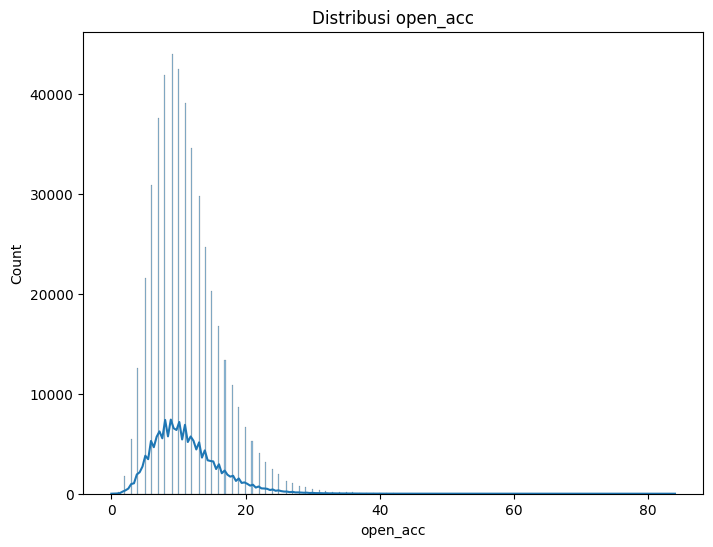

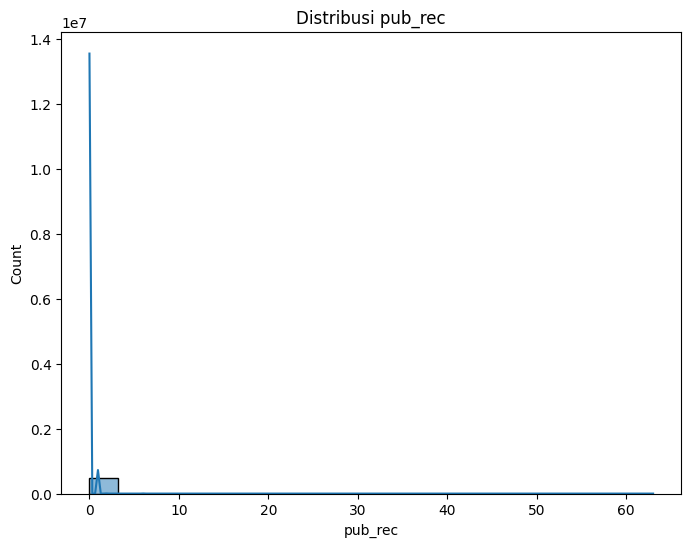

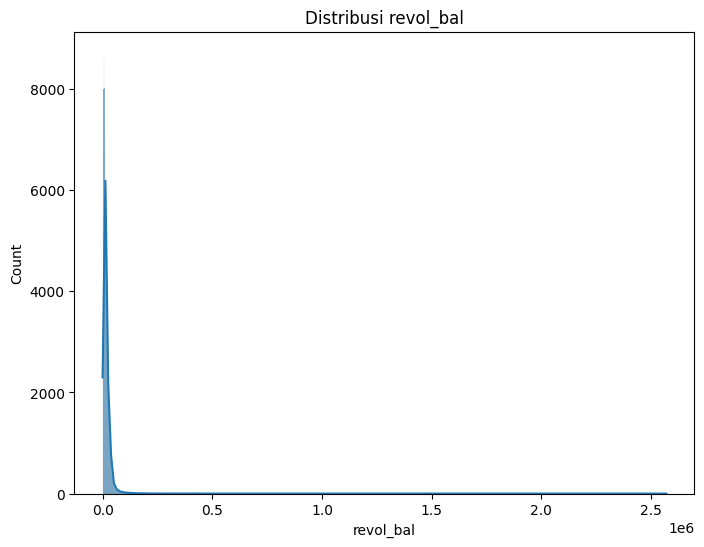

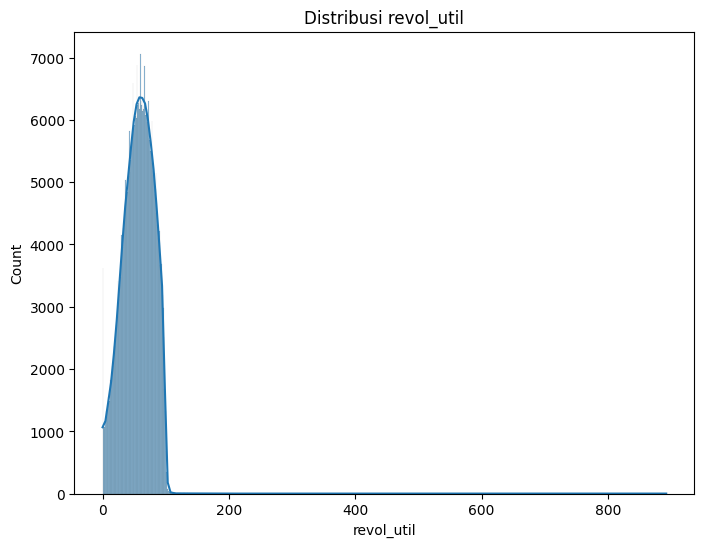

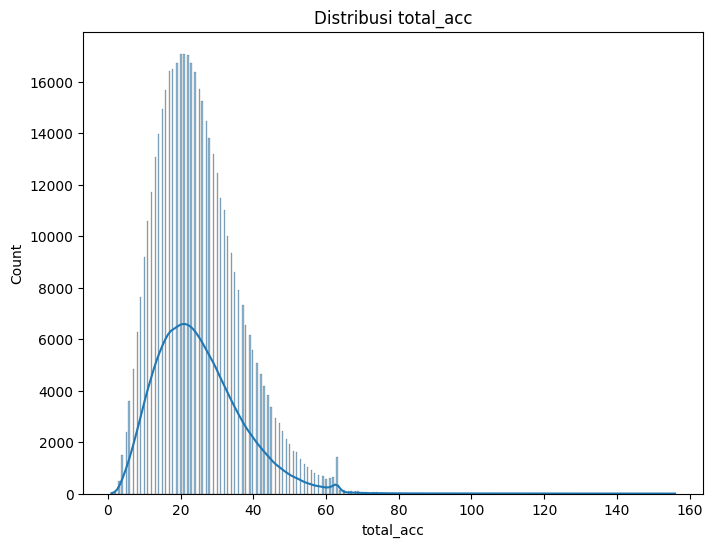

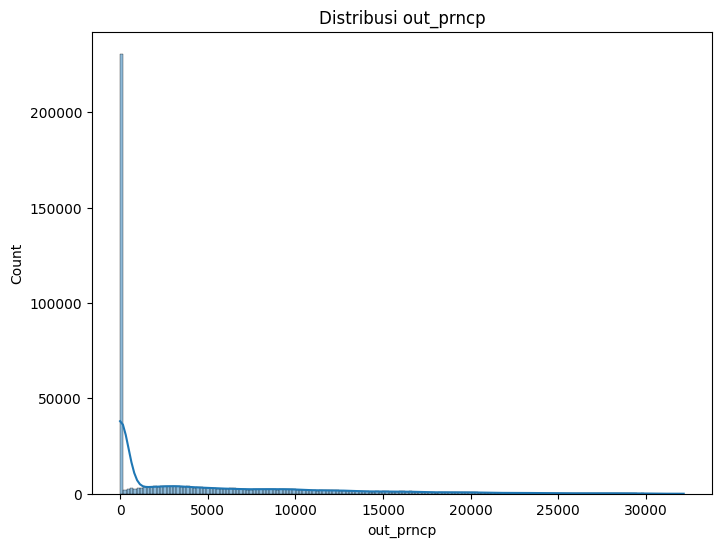

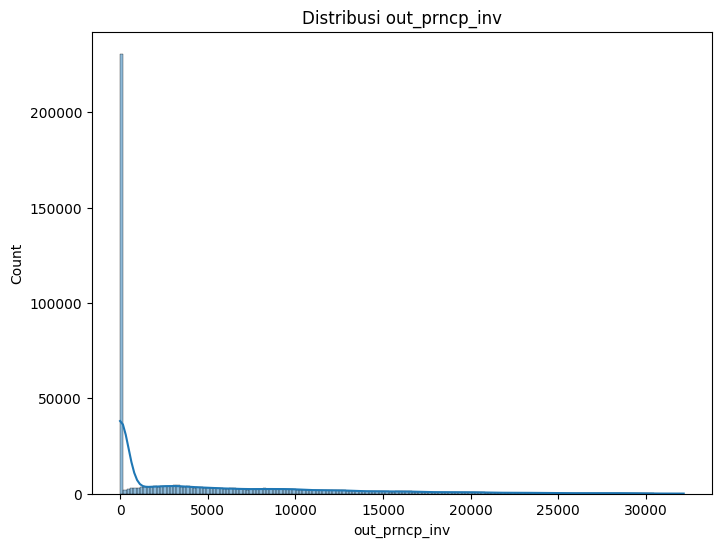

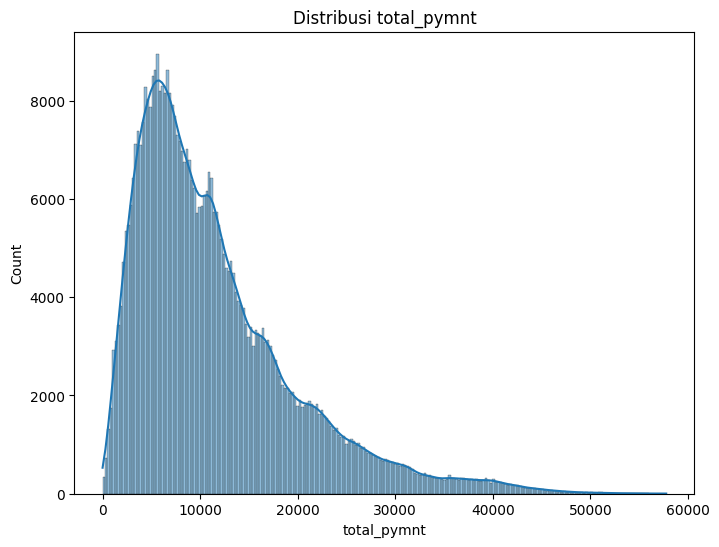

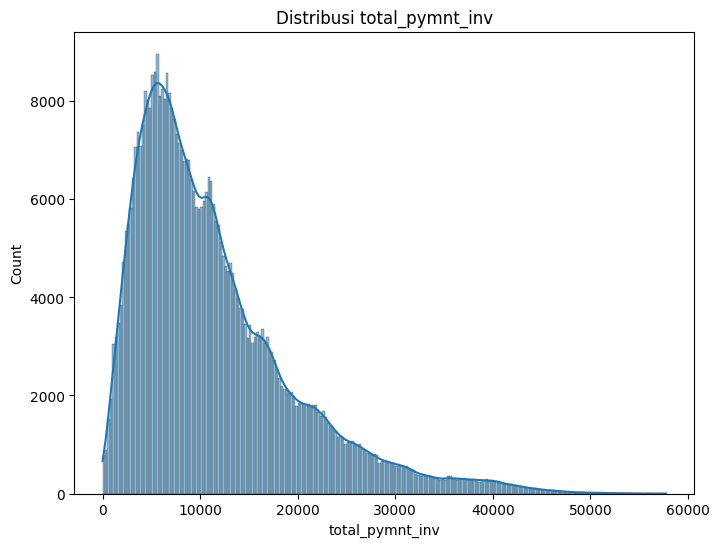

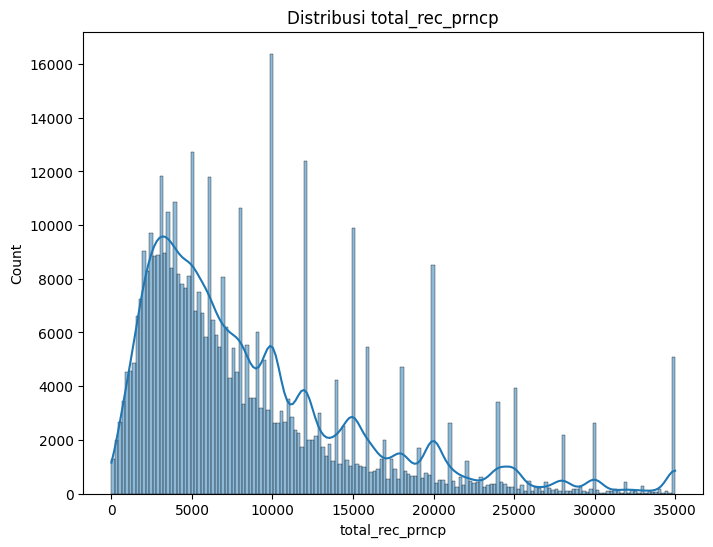

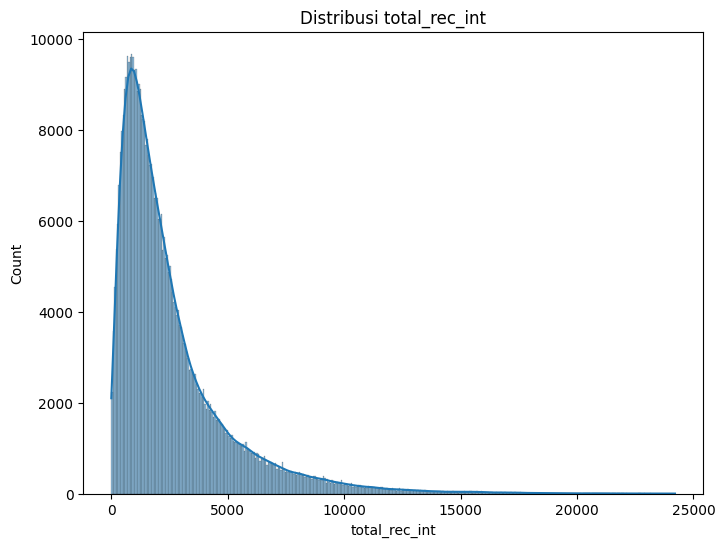

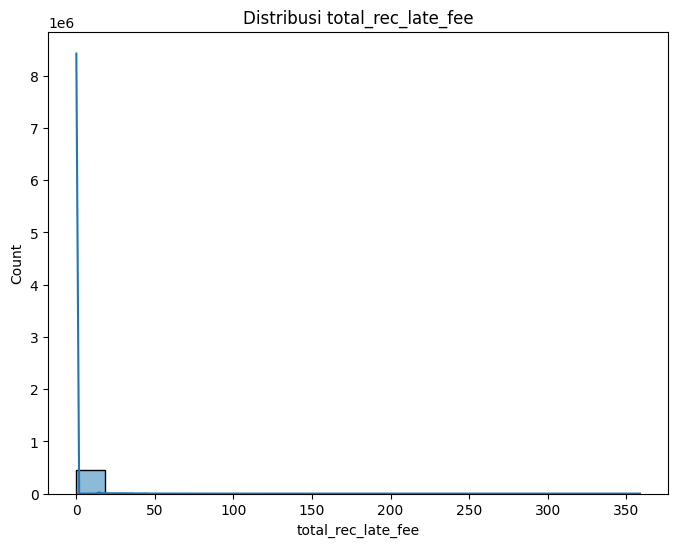

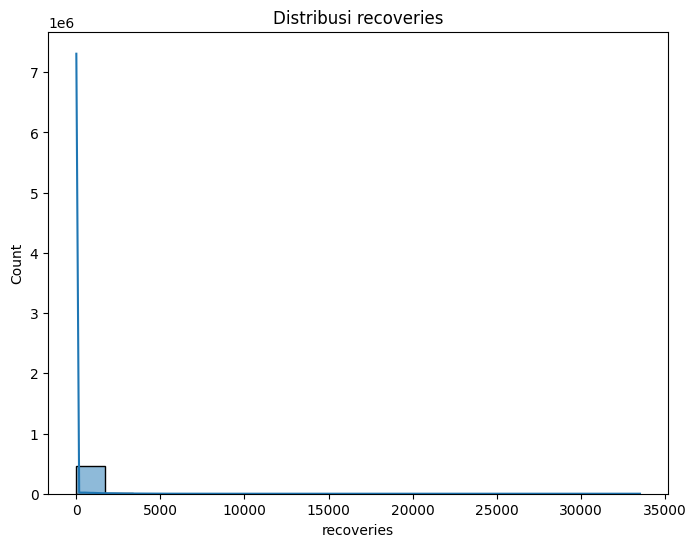

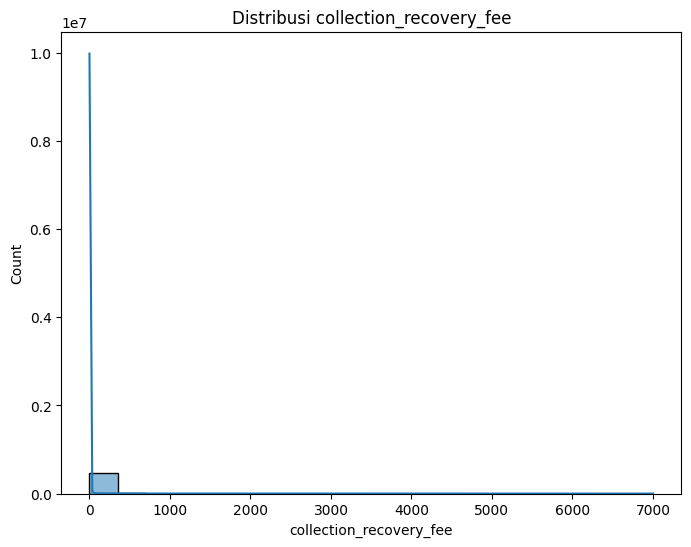

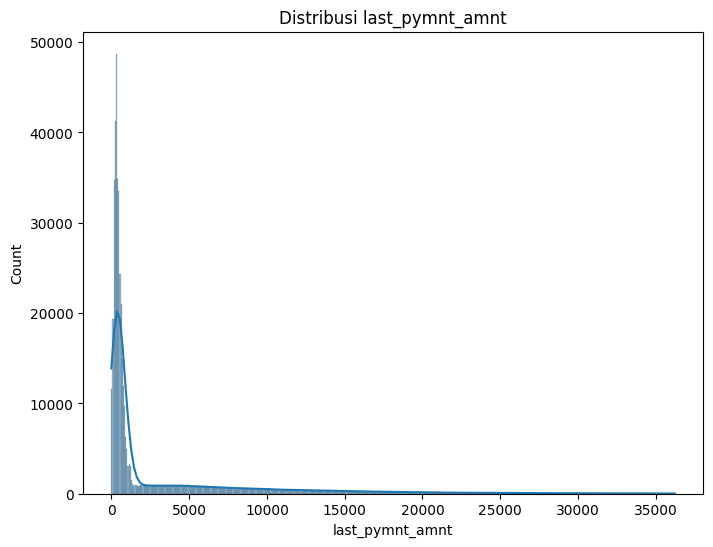

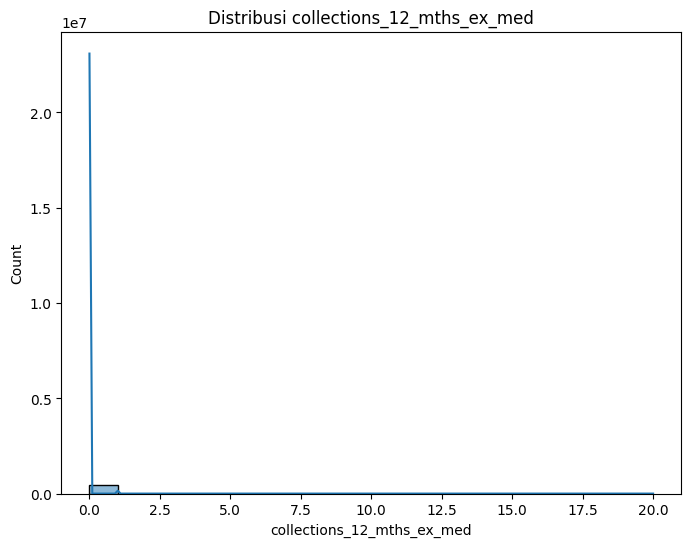

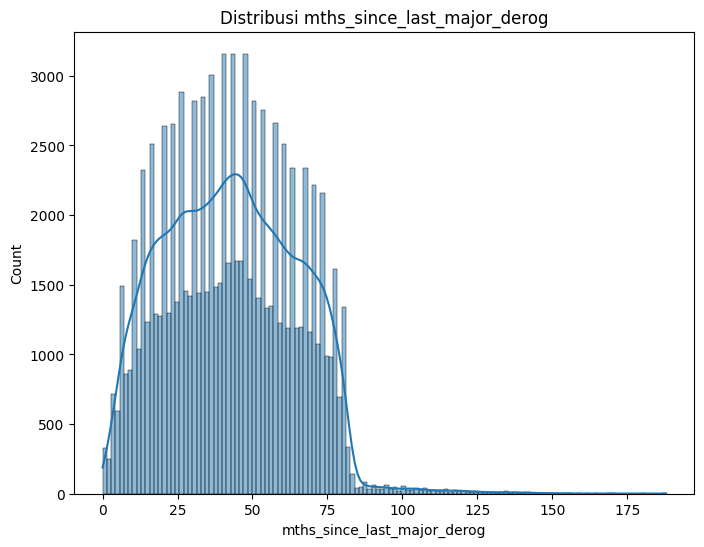

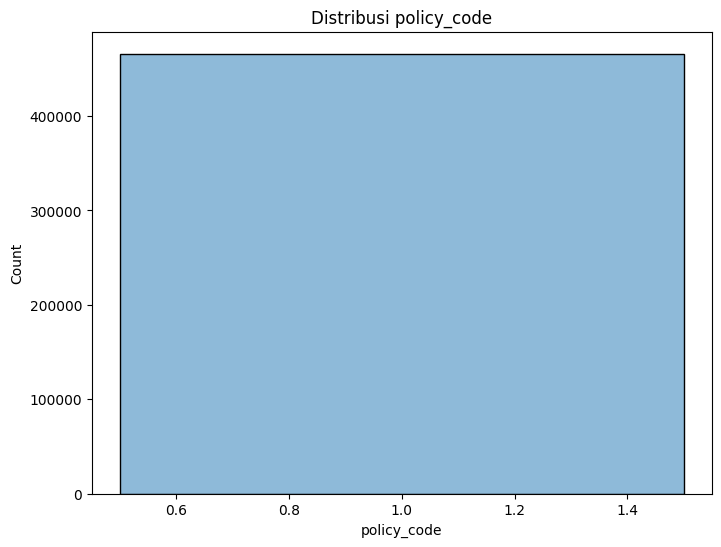

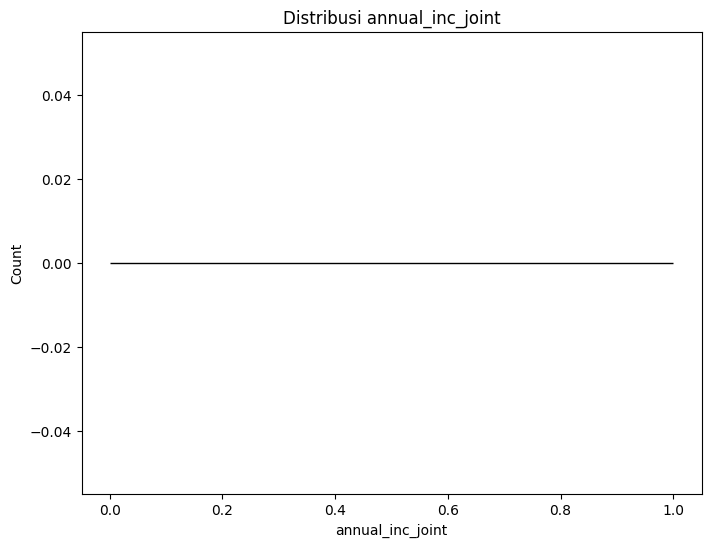

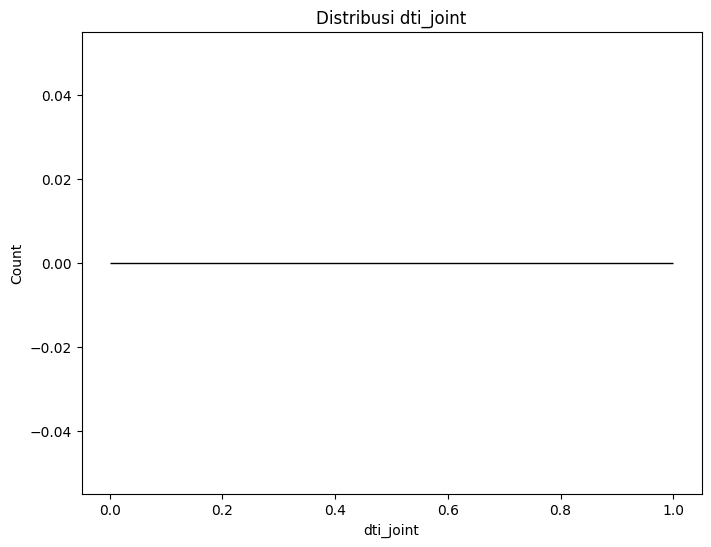

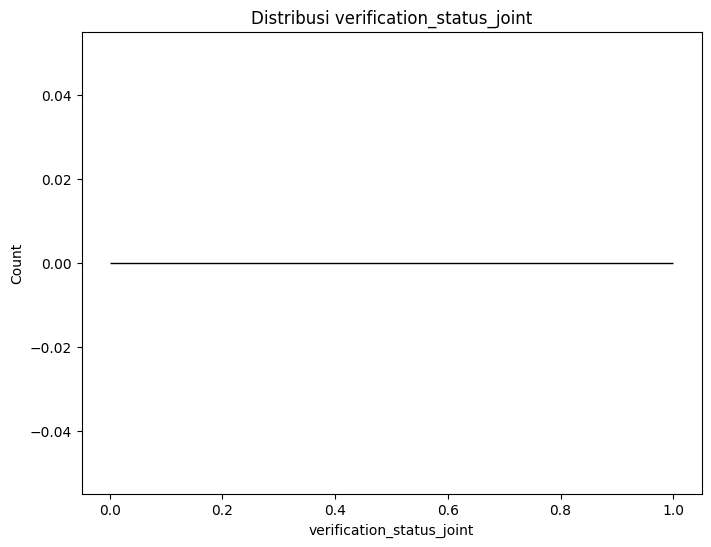

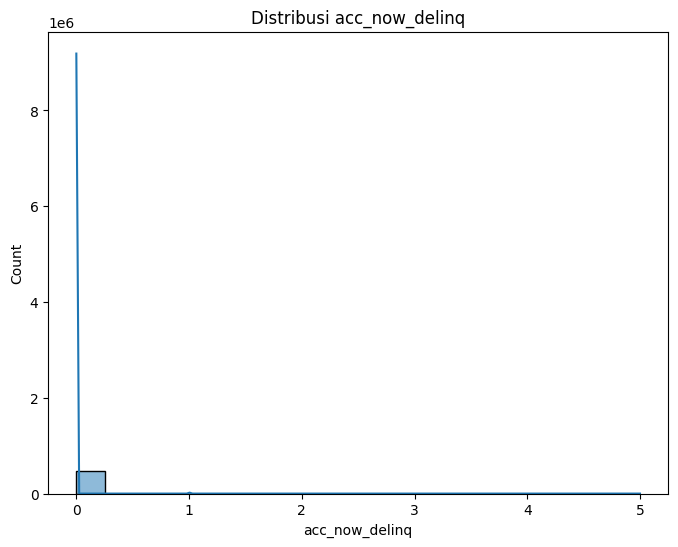

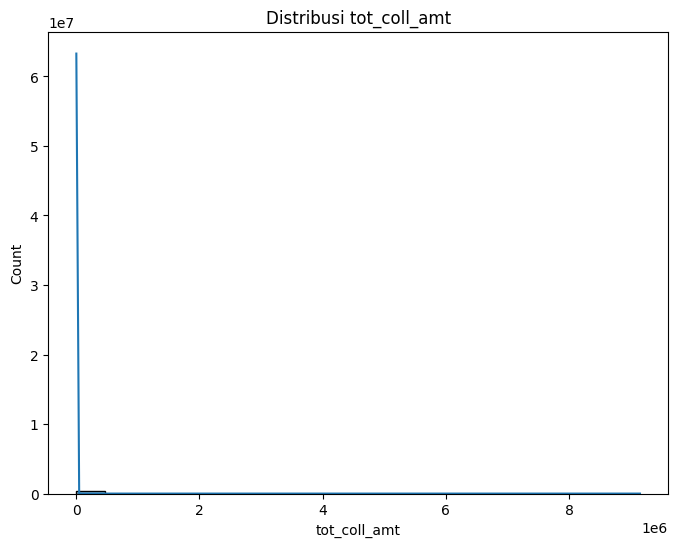

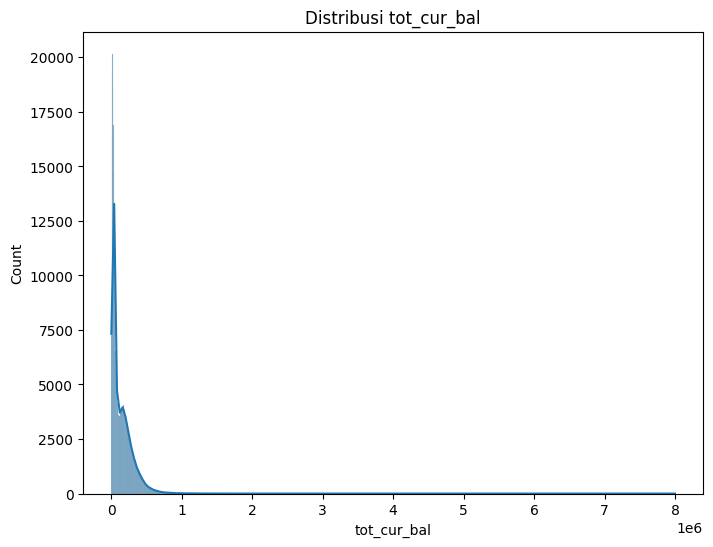

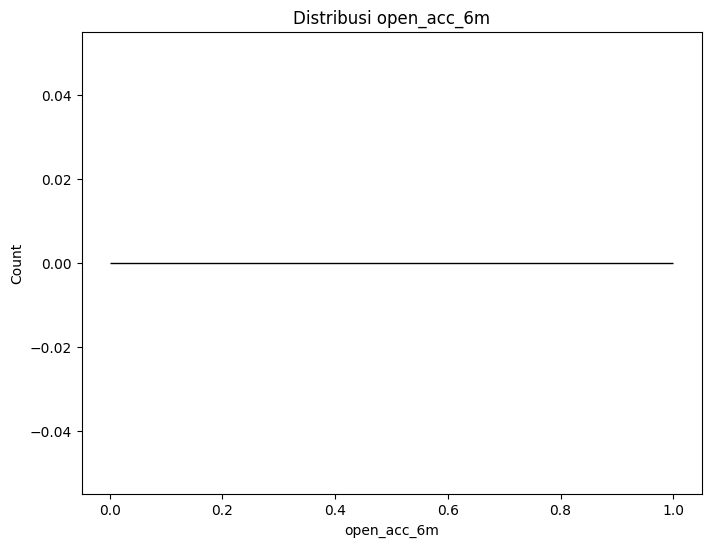

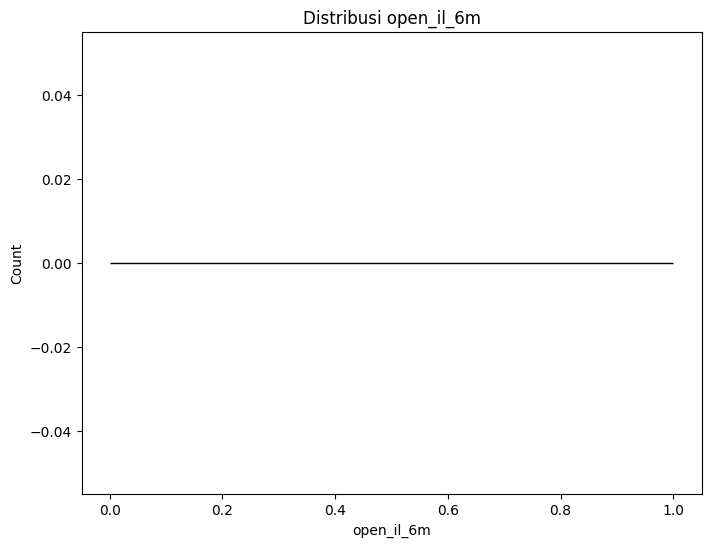

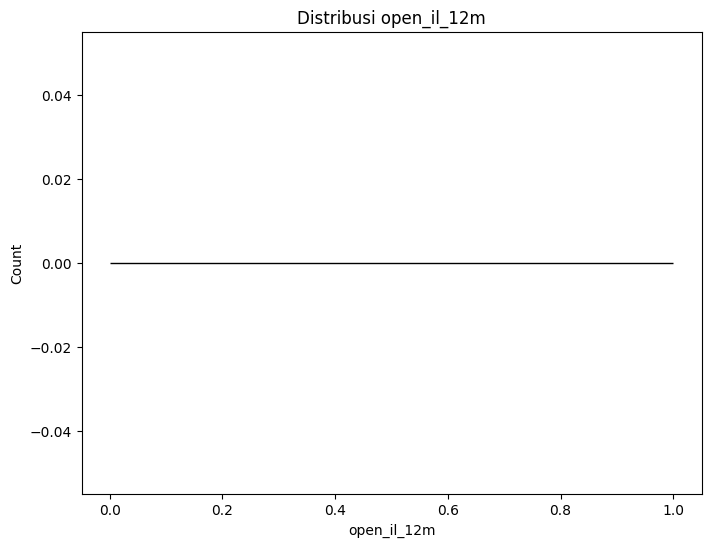

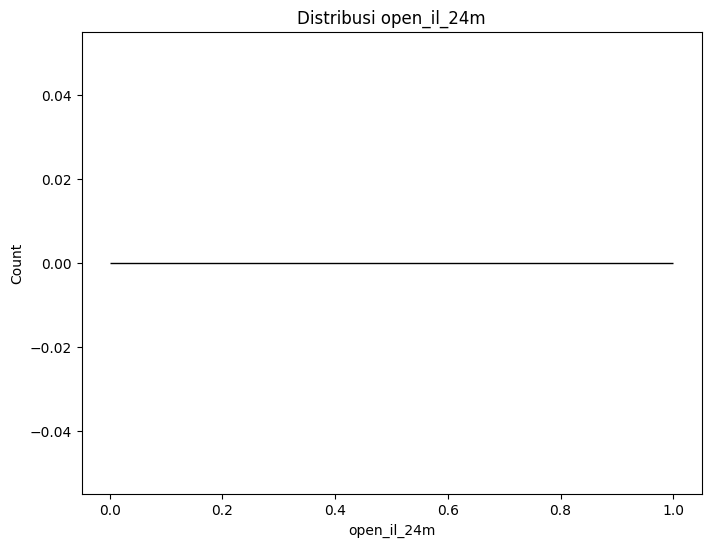

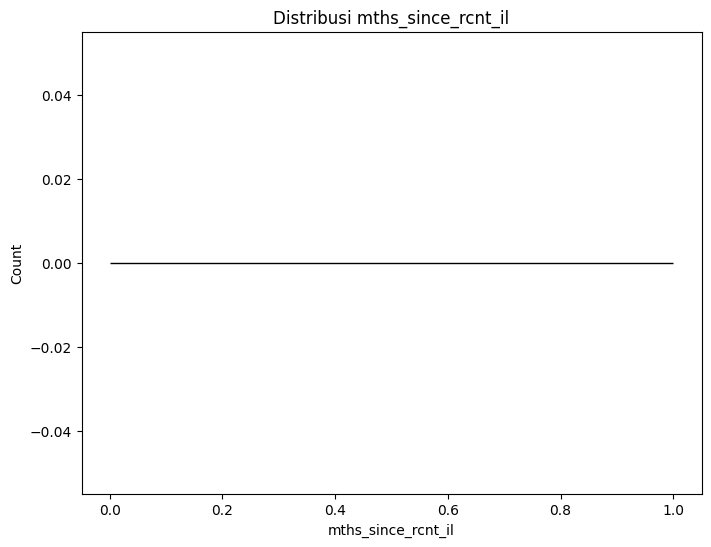

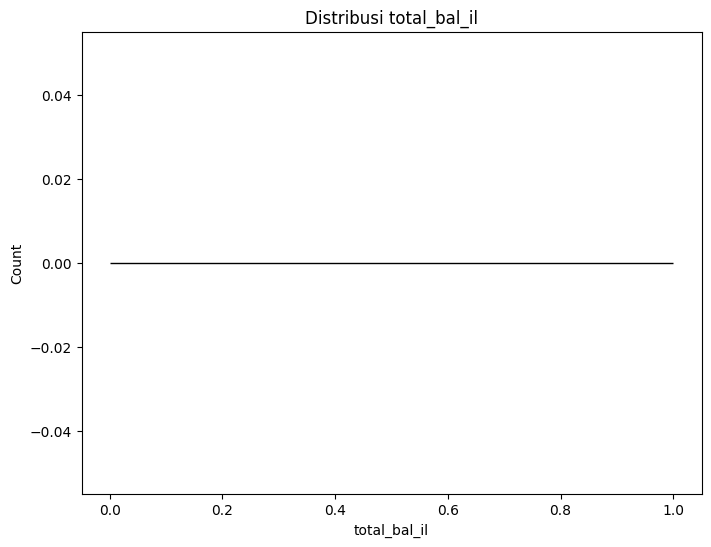

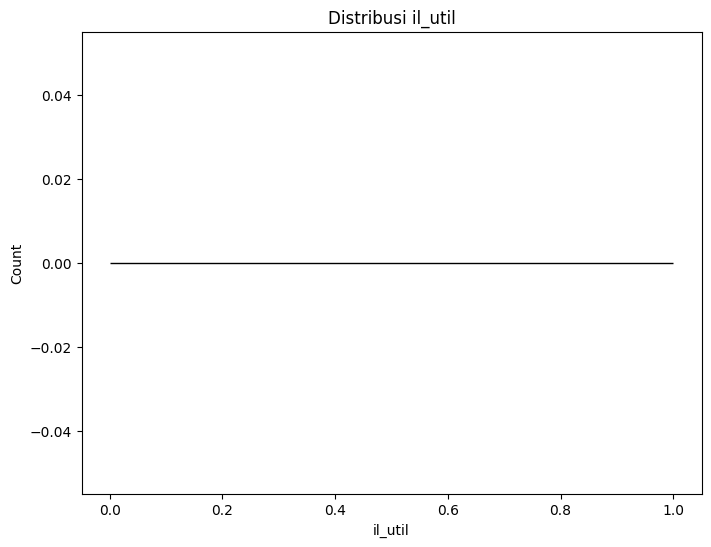

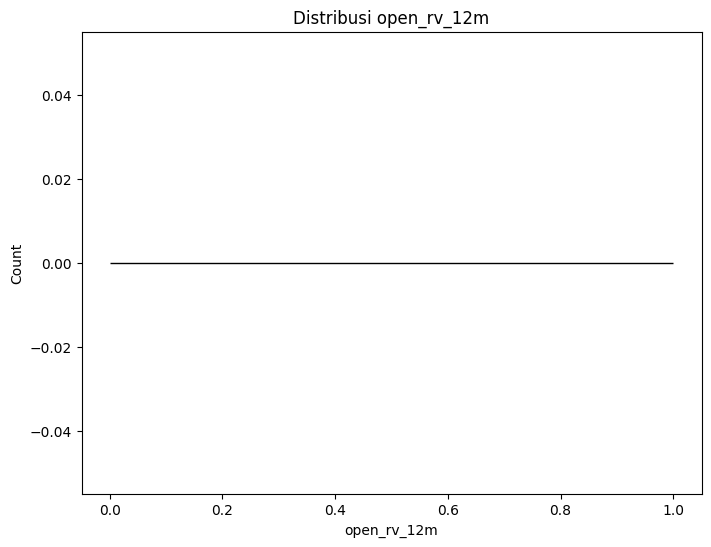

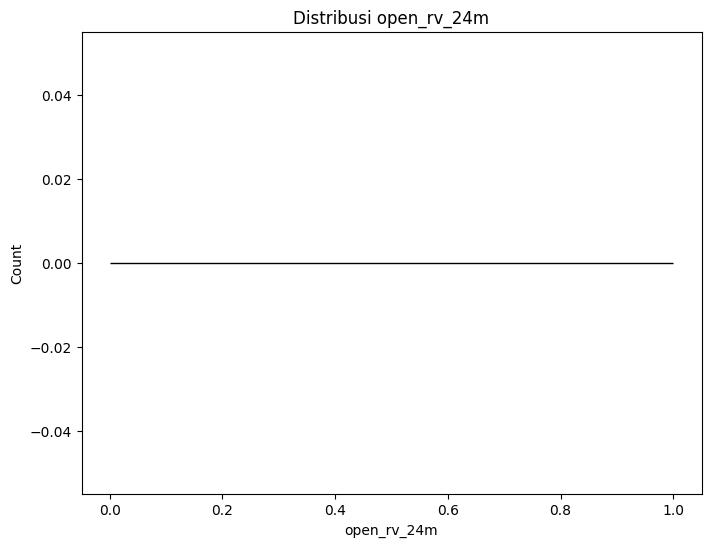

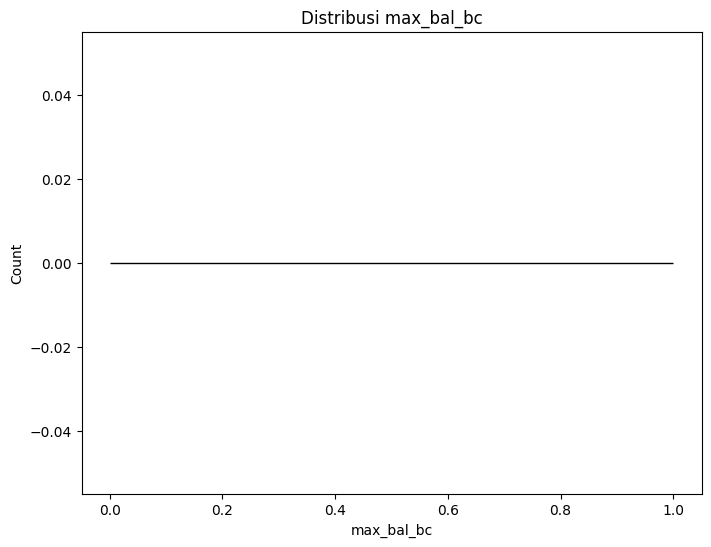

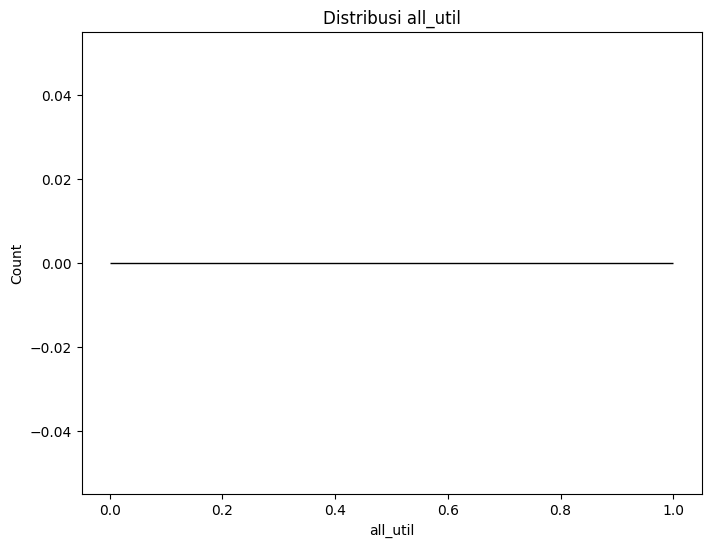

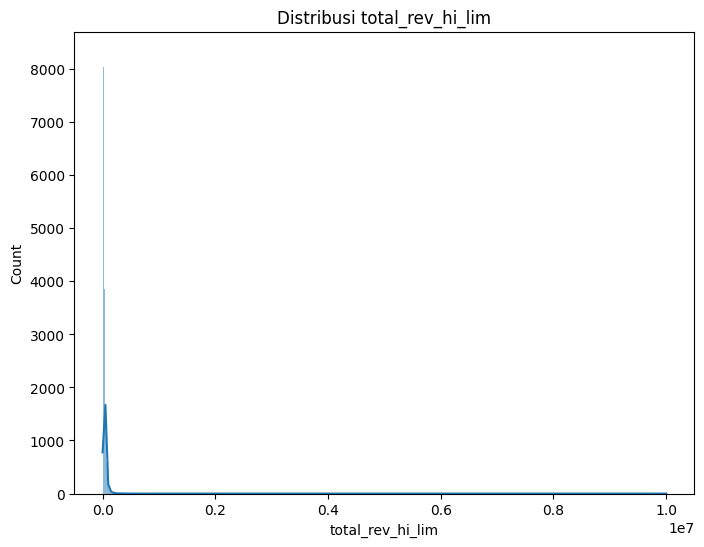

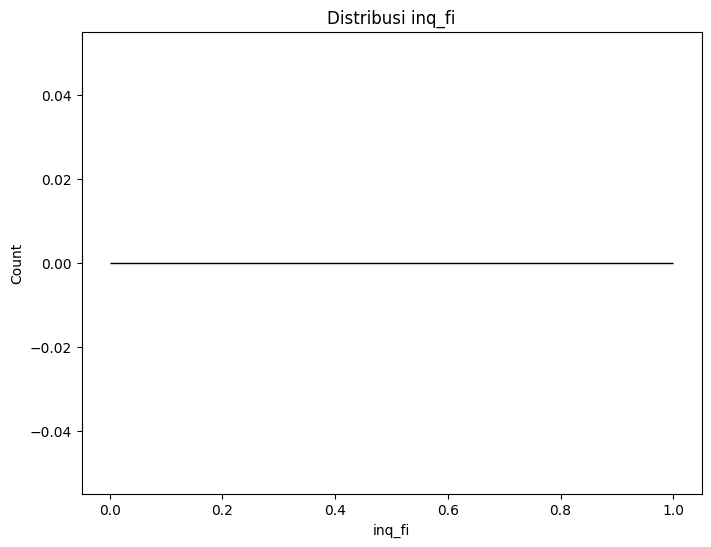

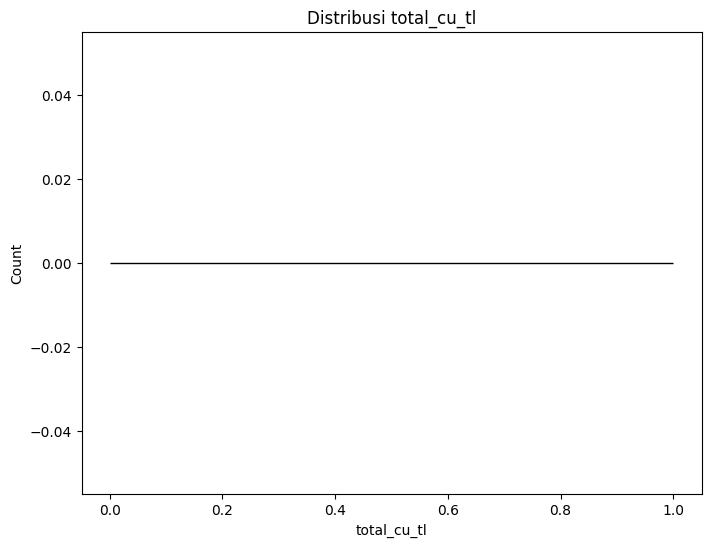

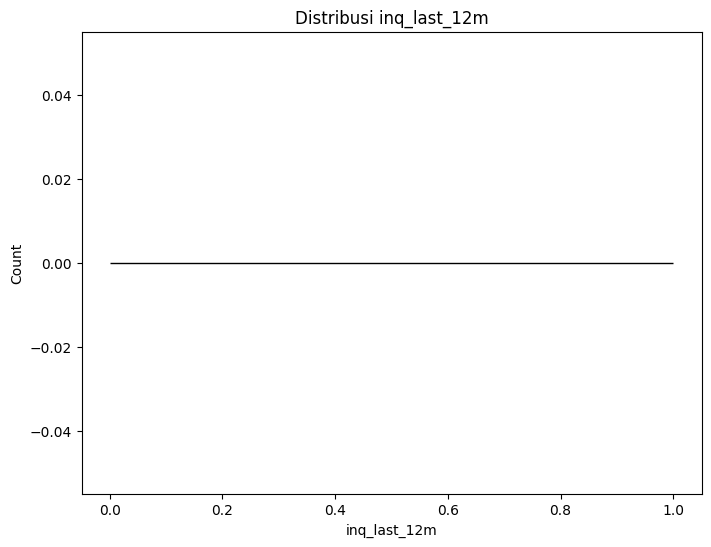

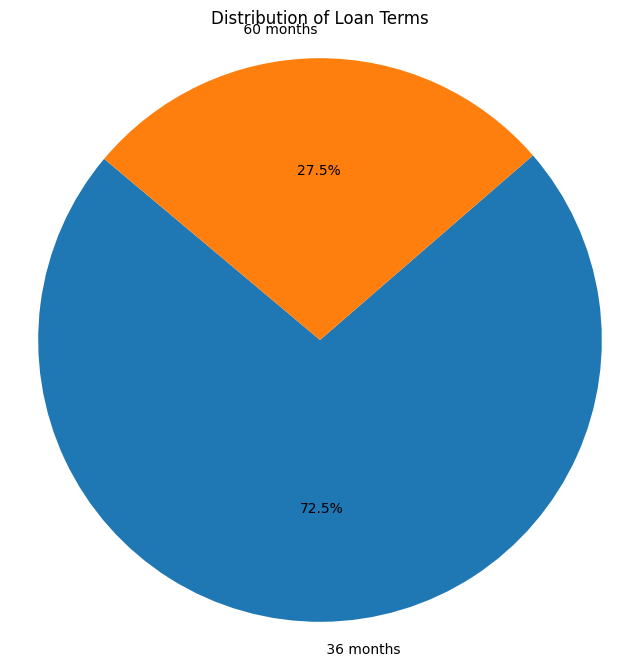

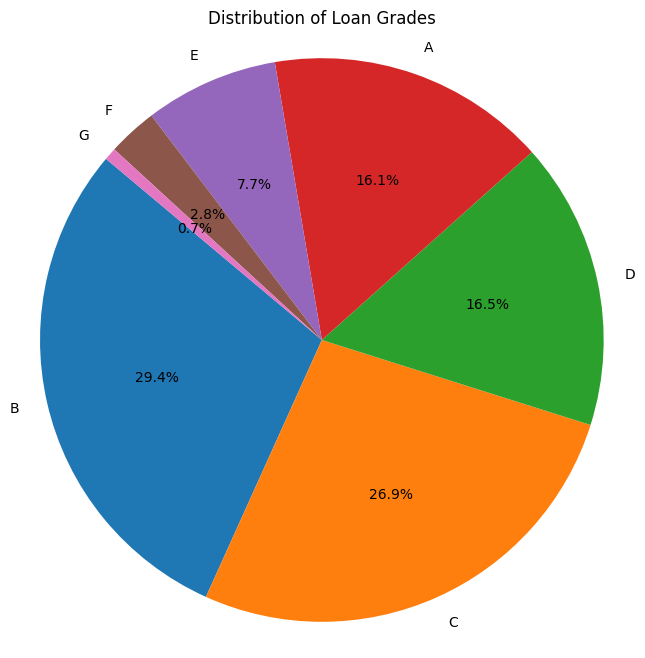

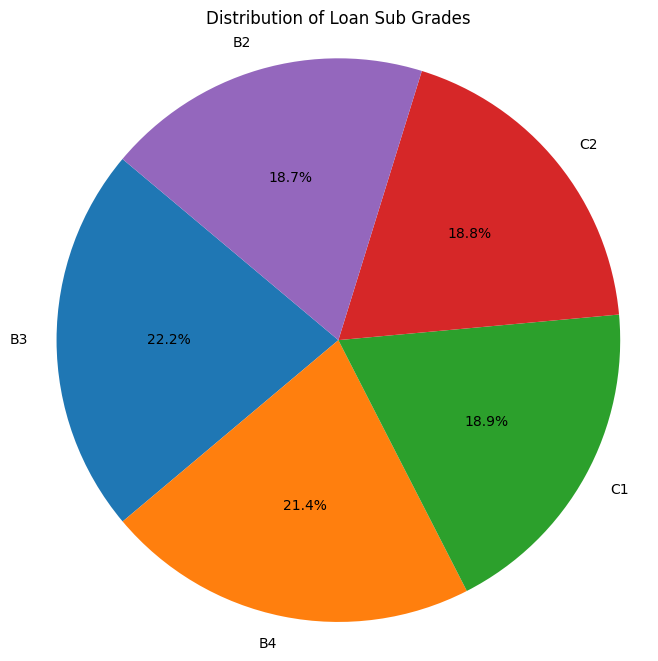

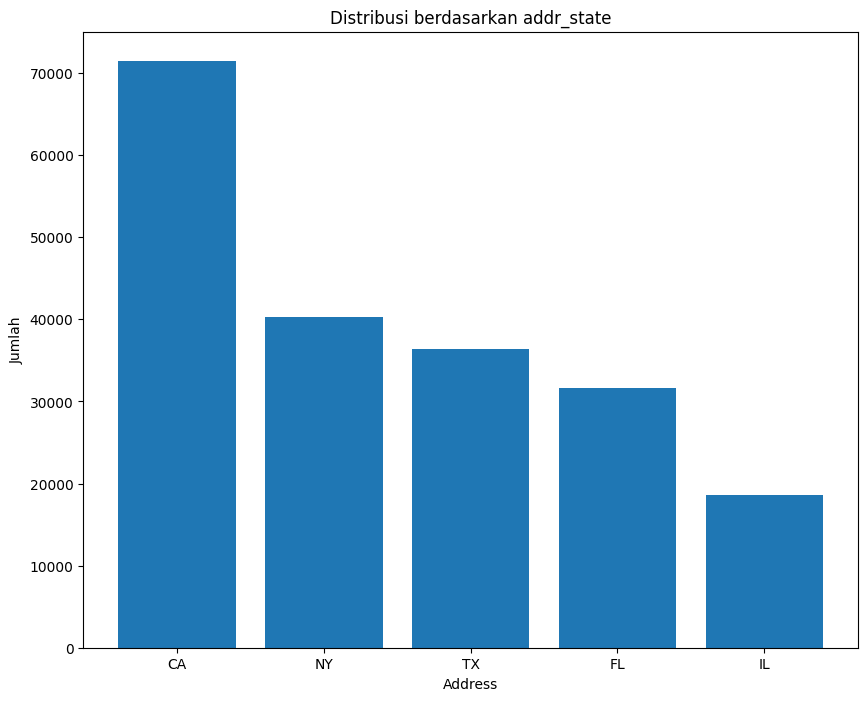

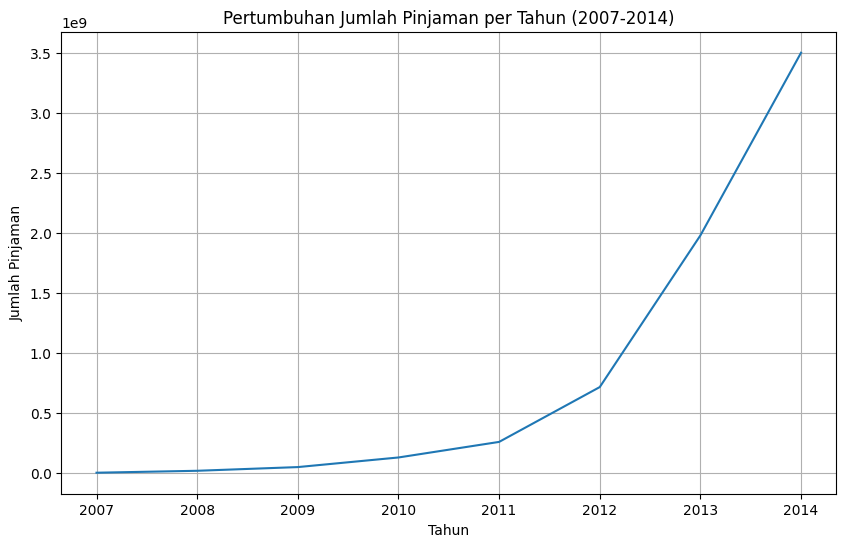

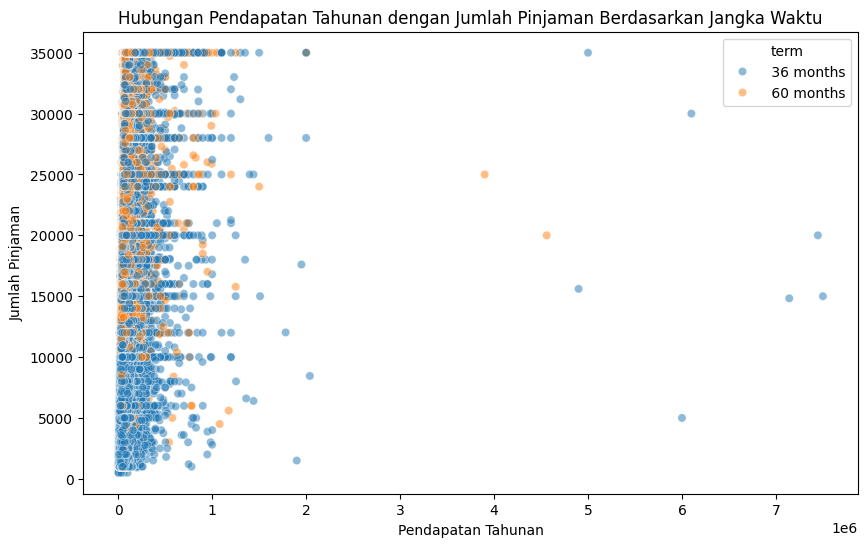

In [ ]:
df_original = pd.read_csv('/content/drive/MyDrive/Colab/loan_data_2007_2014.csv')

# Melihat distribusi
distribusi_col = df_original.select_dtypes(include='number').columns

for col in distribusi_col:
    plt.figure(figsize=(8,6))
    sns.histplot(data=df_original, x=col, kde=True)
    plt.title(f"Distribusi {col}")
    plt.show()

# Melihat perbandingan jumlah dari setiap nilai pada kolom term dalam bentuk pie chart
term_counts = df_original['term'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(term_counts, labels=term_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Loan Terms')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Melihat perbandingan jumlah dari setiap nilai pada kolom grade dalam bentuk pie chart
# Melihat dalam artian grade mana yang paling banyak dipilih oleh peminjam
grade_counts= df_original['grade'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%.1f%%', startangle=140)
plt.title('Distribution of Loan Grades')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Melihat perbandingan jumlah dari setiap nilai pada kolom subgrade dalam bentuk pie chart
# Melihat dalam artian subgrade mana yang paling banyak dipilih oleh peminjam
sub_grade_counts= df_original['sub_grade'].value_counts().nlargest(5)
plt.figure(figsize=(8,8))
plt.pie(sub_grade_counts, labels=sub_grade_counts.index, autopct='%.1f%%', startangle=140)
plt.title('Distribution of Loan Sub Grades')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Melihat perbandingan jumlah dari setiap nilai pada kolom add_state
# Dalam artian melihat daerah mana yang paling banyak nasabahnya
addr_state_counts = df_original['addr_state'].value_counts().nlargest(5) #n.largest untuk mengambil top 5
plt.figure(figsize=(10,8))
plt.bar(addr_state_counts.index.astype(str), addr_state_counts.values) #addr_state_counts.index.astype(str) sebagai x dan addr_state_counts. value sebagai y
plt.title('Distribusi berdasarkan addr_state')
plt.xlabel('Address')
plt.ylabel('Jumlah')
plt.show()

# Membuat chart garis pertumbuhan loan_ammount dari tahun 2007 sampai tahun 2014
df_original['issue_d'] = pd.to_datetime(df_original['issue_d'], format='%b-%y')
df_original['year'] = df_original['issue_d'].dt.year

loan_growth_by_year = df_original.groupby('year')['loan_amnt'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=loan_growth_by_year, x='year', y='loan_amnt')
plt.title('Pertumbuhan Jumlah Pinjaman per Tahun (2007-2014)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pinjaman')
plt.grid(True)
plt.show()

# Membuat chart scatter hubungan pendapatan tahunan dengan jumlah pinjaman yang diambil berdasarkan perbandingan jangka waktu (term) pinjaman
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_original, x='annual_inc', y='loan_amnt', hue='term', alpha=0.5)
plt.title('Hubungan Pendapatan Tahunan dengan Jumlah Pinjaman Berdasarkan Jangka Waktu')
plt.xlabel('Pendapatan Tahunan')
plt.ylabel('Jumlah Pinjaman')
plt.show()

# 2. DATA PREPARATION




MEMBERSIHKAN OUTLIER
===

In [ ]:
'''  Membersihkan kolom data yang mengandung outlier '''
for col_used in df.columns[:-1]:
  if pd.api.types.is_numeric_dtype(df[col_used]):
    Q1 = df[col_used].quantile(0.25)
    Q3 = df[col_used].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col_used] = df[col_used].clip(lower_bound, upper_bound)


Informasi DataFrame setelah menghapus kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 44 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   acc_now_delinq              466256 non-null  float64
 1   addr_state                  466285 non-null  object 
 2   annual_inc                  466281 non-null  float64
 3   collection_recovery_fee     466285 non-null  float64
 4   collections_12_mths_ex_med  466140 non-null  float64
 5   delinq_2yrs                 466256 non-null  float64
 6   dti                         466285 non-null  float64
 7   earliest_cr_line            466256 non-null  object 
 8   emp_length                  445277 non-null  object 
 9   funded_amnt                 466285 non-null  int64  
 10  funded_amnt_inv             466285 non-null  float64
 11  grade                       466285 non-null  object 
 12  home_ownership            

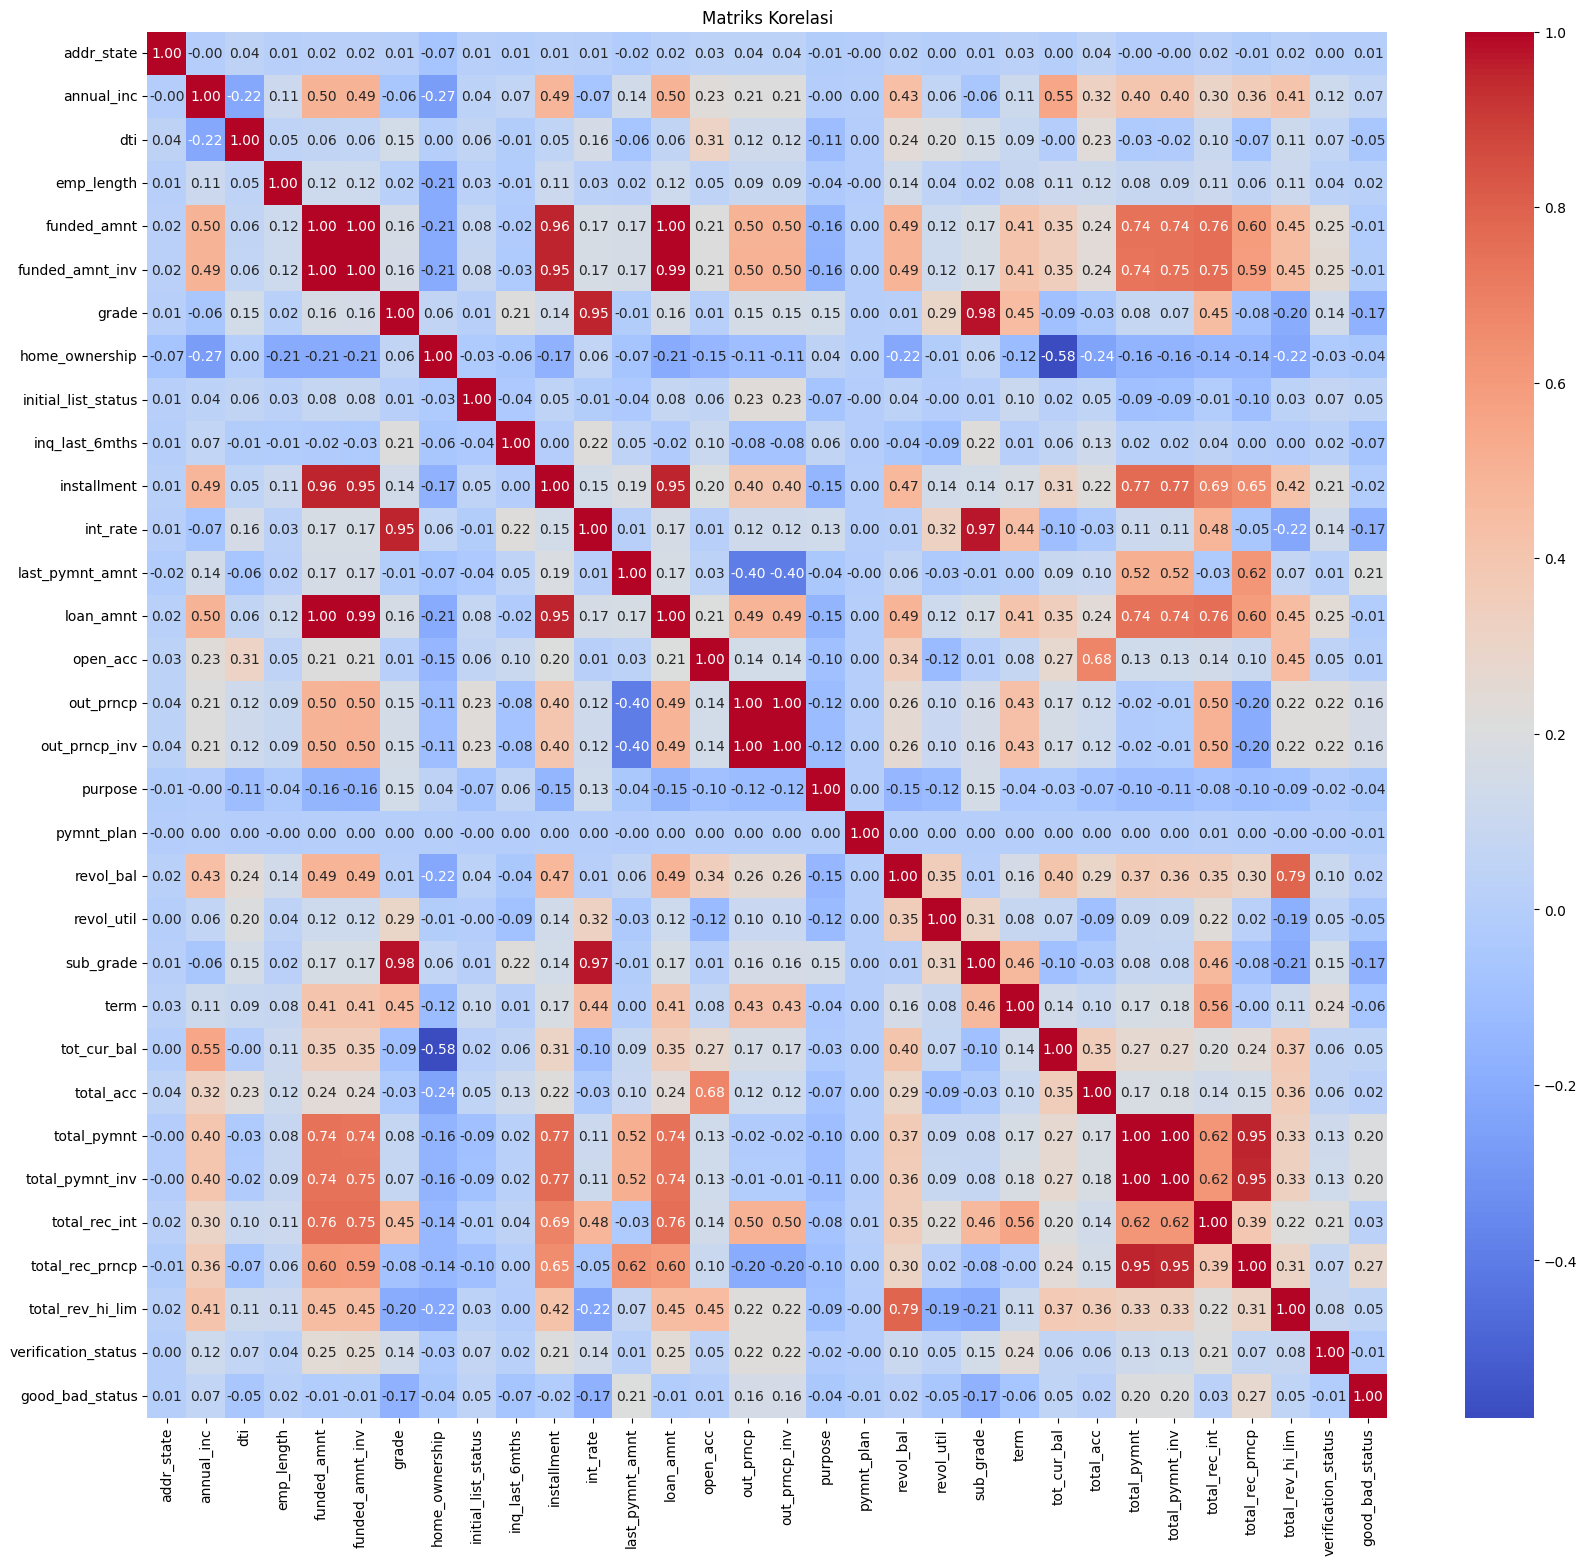


Berikut Info Tipe Data terbaru dari dataframe: 

acc_now_delinq                       float64
addr_state                             int64
annual_inc                           float64
collection_recovery_fee              float64
collections_12_mths_ex_med           float64
delinq_2yrs                          float64
dti                                  float64
earliest_cr_line              datetime64[ns]
emp_length                           float64
funded_amnt                            int64
funded_amnt_inv                      float64
grade                                  int64
home_ownership                         int64
initial_list_status                    int64
inq_last_6mths                       float64
installment                          float64
int_rate                             float64
issue_d                       datetime64[ns]
last_credit_pull_d            datetime64[ns]
last_pymnt_amnt                      float64
last_pymnt_d                  datetime64[ns]
loan_

In [ ]:
# Membuang data dengan memilih kolom yang ingin dipertahankan
columns_to_remove = ['desc', 'mths_since_last_delinq', 'mths_since_last_record',
                     'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
                     'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
                     'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
                     'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi',
                     'total_cu_tl', 'inq_last_12m', 'next_pymnt_d','Column1', 'id', 'member_id', 'emp_title',
                     'url', 'title', 'policy_code', 'application_type', 'Unnamed: 0'
                     , 'zip_code']

# Dapatkan semua nama kolom
all_columns = df.columns

# Dapatkan nama kolom yang ingin dipertahankan (semua kolom dikurangi kolom yang akan dihapus)
columns_to_keep = all_columns.difference(columns_to_remove)

# Buat DataFrame baru dengan hanya kolom yang dipertahankan
df = df[columns_to_keep]

print('\nInformasi DataFrame setelah menghapus kolom:')
print(df.info())
print('\nDimensi DataFrame setelah menghapus kolom:')
print(df.shape, '\n')
#=====================================================================

# Mentransformasikan data objek menjadi waktu
datetime_col = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
# Mengecek apakah date time masih berada di kolom df
datetime_col_present = [col for col in datetime_col if col in df.columns]
if datetime_col_present:
  print(df[datetime_col_present].info())
  print(df[datetime_col_present])
  for col in datetime_col_present:
      df[col] = pd.to_datetime(df[col], format='%b-%y', errors='coerce')
else:
  print("\nDatetime columns were already removed.")


# Merubah dari data objek menjadi numeric
'''> Catatan
---> Penambahan kolom baru untuk label atau target klasifikasi ['loan_status' = 'good_bad_status']
---> Label Encoding kolom ['home_ownership', 'purpose', 'addr_state', 'initial_list_status'
      , '']
---> Ordinal Encoding kolom ['term', 'grade', 'sub_grade', 'emp_length', 'verification_status'
      , 'pymnt_plan']
'''
# Melakukan encoding loan_status untuk menjadi kolom good_bad_status
# Encoding loan_status
loan_status_mapping = {
    'Fully Paid': 1,
    'Charged Off': 0,
    'Current': 1,
    'Default': 0,
    'Late (31-120 days)': 0,
    'In Grace Period': 1,
    'Late (16-30 days)': 0,
    'Does not meet the credit policy. Status:Fully Paid': 1,
    'Does not meet the credit policy. Status:Charged Off': 0
}

# Menambahkan kolom baru 'good_bad_status' berdasarkan mapping
df['good_bad_status'] = df['loan_status'].map(loan_status_mapping)

# Menampilkan hasil
print('\nBerikut value terbaru dari kolom good_bad_status:', df['good_bad_status'])
print('\nBerikut jumlah dari setiap value kolom good_bad_status', df['good_bad_status'].value_counts(), '\n')


# Menghapus kolom loan_status karena sudah diganti menjadi good_bad_status
df = df.drop('loan_status', axis=1)
#===========================================================================

# Melakukan label encoding dan ordinal encoding
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# Melakukan label encoding
# Kolom yang ingin di-label encode

Label_Encoding_kolom = ['home_ownership', 'purpose', 'addr_state', 'initial_list_status']

# Dictionary untuk menyimpan encoder tiap kolom
encoders = {}

for col in Label_Encoding_kolom:
    le = preprocessing.LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

# Menampilkan hasil label encoding
print('\nIni adalah hasil label encoding\n', df)
# ==========================================================

# Melakukan ordinal encoding
# Definisikan urutan nilai untuk setiap kolom ordinal
ordinal_mapping = {
    'term': {' 36 months': 0, ' 60 months': 1},
    'grade': {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6},
    'sub_grade': {
        'A1':0,'A2':1,'A3':2,'A4':3,'A5':4,
        'B1':5,'B2':6,'B3':7,'B4':8,'B5':9,
        'C1':10,'C2':11,'C3':12,'C4':13,'C5':14,
        'D1':15,'D2':16,'D3':17,'D4':18,'D5':19,
        'E1':20,'E2':21,'E3':22,'E4':23,'E5':24,
        'F1':25,'F2':26,'F3':27,'F4':28,'F5':29,
        'G1':30,'G2':31,'G3':32,'G4':33,'G5':34
    },
    'emp_length': {
        '< 1 year':0,'1 year':1,'2 years':2,'3 years':3,'4 years':4,
        '5 years':5,'6 years':6,'7 years':7,'8 years':8,'9 years':9,'10+ years':10
    },
    'verification_status': {'Not Verified':0, 'Verified':1, 'Source Verified':2},
    'pymnt_plan': {'n':0, 'y':1}
}

# Kolom yang ingin di-ordinal encode
Ordinal_Encoding_kolom = list(ordinal_mapping.keys())

# Terapkan mapping ke DataFrame
for col in Ordinal_Encoding_kolom:
    df[col] = df[col].map(ordinal_mapping[col])

# Menampilkan hasil ordinal encoding
print('\nIni adalah hasil ordinal encoding\n', df)
# ================================================

# Melihat kekuatan hubungan antar variabel
numerical_data = df.select_dtypes(include=np.number).copy() # Membuat sebuah copy untuk menghindari SettingWithCopyWarning
# Mengeceualikan kolom bertipe data date time dari tipe data numerik sebelum menghitung korelasi
numerical_data = numerical_data.select_dtypes(exclude=['datetime64[ns]'])

# Menghapus kolom dengan 0 variansi sebelum menghitung korelasi
variance = numerical_data.var()
constant_columns = variance[variance == 0].index
numerical_data = numerical_data.drop(columns=constant_columns)
print(f"\nKolom dengan varians nol yang dihapus sebelum menghitung korelasi: {list(constant_columns)}")


correlation_matrix = numerical_data.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

# Hasil typedata terbaru dari dataframe
print('\nBerikut Info Tipe Data terbaru dari dataframe: \n')
print(df.dtypes)
print(df.dtypes.value_counts())
#
# ==================================================================

In [ ]:
# Data Frame sebelum handling missing value
print('Data kolom yang memiliki missing value')
print(df.isna().sum())
print('\nJumlah missing value:', df.isna().sum().sum())
print('Dimensi data:', df.shape)

# Membuang seluruh baris yang mengandung missing value
df.dropna(inplace = True) # inplace = True menetapkan secara permanent data frame baru dengan kondisi sudah membuang missing value (karena digunakan pada fungsi .dropna)

# Data Frame setelah handling missing value
print('\nCek ulang data terbaru setelah dropna')
print(df.isna().sum())
print('\nCek ulang jumlah missing value data terbaru sebanyak:', df.isna().sum().sum())
print('Dimensi ulang data:', df.shape)

Data kolom yang memiliki missing value
acc_now_delinq                   29
addr_state                        0
annual_inc                        4
collection_recovery_fee           0
collections_12_mths_ex_med      145
delinq_2yrs                      29
dti                               0
earliest_cr_line                 29
emp_length                    21008
funded_amnt                       0
funded_amnt_inv                   0
grade                             0
home_ownership                    0
initial_list_status               0
inq_last_6mths                   29
installment                       0
int_rate                          0
issue_d                           0
last_credit_pull_d               42
last_pymnt_amnt                   0
last_pymnt_d                    376
loan_amnt                         0
open_acc                         29
out_prncp                         0
out_prncp_inv                     0
pub_rec                          29
purpose                  

In [ ]:
# Normalisasikan data
# Sebelum mendefinisikan pastikan memisahkan kolom yang numberik dan yang bukan
#
# Pisahkan kolom bertipe bukan numberik dan yang numberik
numerical_cols = df.select_dtypes(include=np.number).columns
non_numerical_cols = df.select_dtypes(exclude=np.number).columns
#
# Membuang kolom bertipe data date time di dalam kolom tipe non-numerik karena tidak diperlukan dalam model
datetime_cols = df.select_dtypes(include=['datetime64[ns]']).columns
non_numerical_cols = non_numerical_cols.drop(datetime_cols, errors='ignore')

# Definisikan MinMaxScaler
scaler = preprocessing.MinMaxScaler()

# Reset indeks untuk menghindari masalah ketidaksejajaran selama penggabungan.
df = df.reset_index(drop=True)

# Scale numerical columns atau kolom numberik
df_norm_numerical = scaler.fit_transform(df[numerical_cols])
df_norm_numerical = pd.DataFrame(df_norm_numerical, columns=numerical_cols)

# Gabungkan kolom numerik yang telah diskalakan dengan kolom non-numerik asli.
df_norm = pd.concat([df_norm_numerical, df[non_numerical_cols]], axis=1)
df = df_norm

# Mencetak dataframe
print(df.head())
print(df.dtypes)
print(df.shape)
print(df.isnull().sum())
print(df.isnull().sum().sum())

   acc_now_delinq  addr_state  annual_inc  collection_recovery_fee  \
0             0.0    0.448980    0.337972                      0.0   
1             0.0    0.081633    0.145792                      0.0   
2             0.0    0.122449    0.669317                      0.0   
3             0.0    0.632653    0.238569                      0.0   
4             0.0    0.183673    0.390987                      0.0   

   collections_12_mths_ex_med  delinq_2yrs       dti  emp_length  funded_amnt  \
0                         0.0          0.0  0.573039         1.0     0.766176   
1                         0.0          0.0  0.629416         0.1     0.257353   
2                         0.0          0.0  0.352042         1.0     0.323529   
3                         0.0          0.0  0.424455         1.0     0.323529   
4                         0.0          0.0  0.413681         0.2     0.411765   

   funded_amnt_inv  ...  tot_cur_bal  total_acc  total_pymnt  total_pymnt_inv  \
0         0

In [ ]:
# Melakukan pengecekan ulang data setelah berbagai proses
# Cek konsistensi data - menampilkan nilai unik untuk seluruh kolom
for col in df.columns:
    grouped_df = df.groupby([col])[col].count()
    print(f"\nGrouped data for column '{col}':\n")
    print(grouped_df)
    print("-" * 30) # Pemisah untuk meningkatkan keterbacaan


Grouped data for column 'acc_now_delinq':

acc_now_delinq
0.0    376571
Name: acc_now_delinq, dtype: int64
------------------------------

Grouped data for column 'addr_state':

addr_state
0.000000     1041
0.020408     4731
0.040816     2797
0.061224     8567
0.081633    56553
0.102041     8039
0.122449     5665
0.142857     1080
0.163265      996
0.183673    24752
0.204082    11979
0.224490     2079
0.244898        2
0.265306        2
0.285714    15158
0.306122     6198
0.326531     3459
0.346939     3624
0.367347     4433
0.387755     8629
0.408163     8850
0.428571        1
0.448980     9364
0.469388     6815
0.489796     6008
0.510204     1120
0.530612     1146
0.551020    10383
0.571429        2
0.591837     1853
0.612245    14396
0.632653     2092
0.653061     5221
0.673469    31648
0.693878    12396
0.714286     3386
0.734694     4810
0.755102    13177
0.775510     1657
0.795918     4506
0.816327      813
0.836735     5615
0.857143    30189
0.877551     2866
0.897959    11435


In [ ]:
# Mengidentifikasi kolom yang memiliki variansi 0 atau kosong
zero_variance_cols = df.columns[df.var() == 0]

# Buang kolom dengan variansi 0 atau kosong
df = df.drop(columns=zero_variance_cols)

print(f"Kolom yang dihapus karena memiliki varians nol: {list(zero_variance_cols)}")
print("\nInformasi DataFrame setelah menghapus kolom dengan varians nol:")
print(df.info())
print("\nDimensi DataFrame setelah menghapus kolom dengan varians nol:")
print(df.shape)

Kolom yang dihapus karena memiliki varians nol: ['acc_now_delinq', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'delinq_2yrs', 'pub_rec', 'recoveries', 'tot_coll_amt', 'total_rec_late_fee']

Informasi DataFrame setelah menghapus kolom dengan varians nol:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376571 entries, 0 to 376570
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   addr_state           376571 non-null  float64
 1   annual_inc           376571 non-null  float64
 2   dti                  376571 non-null  float64
 3   emp_length           376571 non-null  float64
 4   funded_amnt          376571 non-null  float64
 5   funded_amnt_inv      376571 non-null  float64
 6   grade                376571 non-null  float64
 7   home_ownership       376571 non-null  float64
 8   initial_list_status  376571 non-null  float64
 9   inq_last_6mths       376571 non-null  float64
 10  insta

**PEMODELAN**
===

Jumlah data asli : 376571
Jumlah data sampel: 112971
Distribusi target sampel:
good_bad_status
1.0    0.897611
0.0    0.102389
Name: proportion, dtype: float64
good_bad_status
1.0    101404
0.0     11567
Name: count, dtype: int64


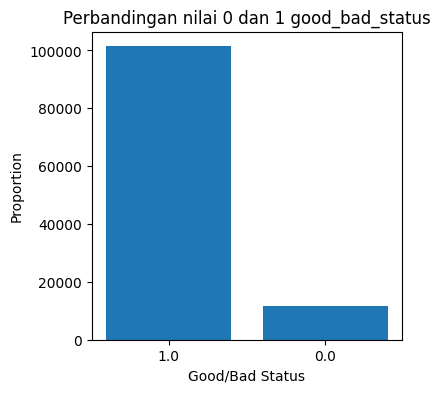


Fitur terpilih: Index(['addr_state', 'annual_inc', 'dti', 'emp_length', 'funded_amnt',
       'funded_amnt_inv', 'grade', 'home_ownership', 'initial_list_status',
       'inq_last_6mths', 'installment', 'int_rate', 'last_pymnt_amnt',
       'loan_amnt', 'open_acc', 'out_prncp', 'out_prncp_inv', 'purpose',
       'pymnt_plan', 'revol_bal', 'revol_util', 'sub_grade', 'term',
       'tot_cur_bal', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_int', 'total_rec_prncp', 'total_rev_hi_lim',
       'verification_status'],
      dtype='object')

Dimensi X latih: (90376, 31)
Dimensi X uji: (22595, 31)
Dimensi y latih: (90376,)
Dimensi y uji: (22595,)

Sebelum oversampling: good_bad_status
1.0    81084
0.0     9292
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=32 is greater than n_features=31. All the features will be returned.
  warnings.warn(


Setelah oversampling: good_bad_status
1.0    81084
0.0    81084
Name: count, dtype: int64


In [ ]:
# Pisahkan data menjadi nilai X dan y
X = df.drop('good_bad_status', axis=1)
y = df['good_bad_status']

# Stratified Sampling
X_sample, _, y_sample, _= train_test_split(
    X, y,
    train_size=0.3,       # Jumlah persen data yang diambil
    stratify=y,           # stratified berdasarkan distribusi target
    random_state=42
)
print("Jumlah data asli :", len(y))
print("Jumlah data sampel:", len(y_sample))
print("Distribusi target sampel:")
print(y_sample.value_counts(normalize=True))
print(y_sample.value_counts())


# Melihat perbandingan jumlah dari setiap nilai pada kolom good_bad_status dalam bentuk bar
grade_counts= y_sample.value_counts()
plt.figure(figsize=(4,4))
plt.bar(grade_counts.index.astype(str), grade_counts.values)
plt.title('Perbandingan nilai 0 dan 1 good_bad_status')
plt.xlabel('Good/Bad Status')
plt.ylabel('Proportion')
plt.show()

# Menentukan fitur yang digunakan
selector = SelectKBest(score_func=f_classif, k=32)
selector.fit(X_sample, y_sample)
selected_features = X.columns[selector.get_support()]
print("\nFitur terpilih:", selected_features)

# Menggunakan sampel data yang sudah distratifikasi untuk pembagian data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(
    X_sample[selected_features], y_sample, test_size=0.2, random_state=42
)

print('\nDimensi X latih:', X_train.shape)
print('Dimensi X uji:', X_test.shape)
print('Dimensi y latih:', y_train.shape)
print('Dimensi y uji:', y_test.shape)
print('\nSebelum oversampling:', pd.Series(y_train).value_counts())

# Oversampling dengan SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print("Setelah oversampling:", pd.Series(y_train_over).value_counts())

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
'''
# Library dibawah digunakan jika ingin menggunakan hyperparameter tuning terkhusus pada random search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
'''

# Definisi model
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train_over, y_train_over)

# --- Evaluasi dari data latih ---
y_train_pred_proba = model.predict_proba(X_train_over)[:, 1]
y_train_pred = (y_train_pred_proba >= 0.5).astype(int) # Asumsikan threshold sama seperti data uji
accuracy_train = accuracy_score(y_train_over, y_train_pred)
roc_auc_train = roc_auc_score(y_train_over, y_train_pred_proba)

print("\nHasil Evaluasi pada Data Latih:")
print(f"- Akurasi: {accuracy_train}")
print(f"- ROC-AUC Score: {roc_auc_train}")


# --- Evaluasi dari data uji ---
# Dapatkan probabilitas yang diprediksi untuk ROC-AUC
y_test_pred_proba = model.predict_proba(X_test)[:, 1]

# Definisikan threshold
threshold = 0.5 # Tentukan threshold yang diinginkan

# Lakukan prediksi dengan data testing menggunakan model terbaik
y_test_pred = (y_test_pred_proba >= threshold).astype(int)


# Evaluasi model
accuracy_test = accuracy_score(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)

# Catatan hasil eksekusi dan parameter model
print("\nHasil Eksekusi pada Data Uji:")
print(f"- Algoritma yang digunakan: Logistic Regression")
print(f"- Fitur yang digunakan: {selected_features}")
print(f"- Akurasi model terbaik: {accuracy_test}")
print(f"- ROC-AUC Score terbaik: {roc_auc_test}")
print("- Laporan Klasifikasi model terbaik:")
print(classification_report(y_test, y_test_pred))


Hasil Evaluasi pada Data Latih:
- Akurasi: 0.902508509693651
- ROC-AUC Score: 0.958932678232835

Hasil Eksekusi pada Data Uji:
- Algoritma yang digunakan: Logistic Regression
- Fitur yang digunakan: Index(['addr_state', 'annual_inc', 'dti', 'emp_length', 'funded_amnt',
       'funded_amnt_inv', 'grade', 'home_ownership', 'initial_list_status',
       'inq_last_6mths', 'installment', 'int_rate', 'last_pymnt_amnt',
       'loan_amnt', 'open_acc', 'out_prncp', 'out_prncp_inv', 'purpose',
       'pymnt_plan', 'revol_bal', 'revol_util', 'sub_grade', 'term',
       'tot_cur_bal', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_int', 'total_rec_prncp', 'total_rev_hi_lim',
       'verification_status'],
      dtype='object')
- Akurasi model terbaik: 0.9452091170612967
- ROC-AUC Score terbaik: 0.9504858527299472
- Laporan Klasifikasi model terbaik:
              precision    recall  f1-score   support

         0.0       0.69      0.82      0.75      2275
         1.0       0.

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
'''
# Library dibawah digunakan jika ingin menggunakan hyperparameter tuning terkhusus pada random search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
'''

# Definisikan model
model = xgb.XGBClassifier(random_state=42, class_weight='balanced', use_label_encoder=False, eval_metric='logloss') # Corrected: use XGBClassifier
model.fit(X_train_over, y_train_over)

# --- Evaluaasi dari data latih ---
y_train_pred_proba = model.predict_proba(X_train_over)[:, 1]
y_train_pred = (y_train_pred_proba >= 0.5).astype(int) # Asumsikan threshold sama seperti data uji
accuracy_train = accuracy_score(y_train_over, y_train_pred)
roc_auc_train = roc_auc_score(y_train_over, y_train_pred_proba)

print("\nHasil Evaluasi pada Data Latih:")
print(f"- Akurasi: {accuracy_train}")
print(f"- ROC-AUC Score: {roc_auc_train}")

# --- Evaluasi dari data uji ---
# Prediksi probabilitas untuk ROC-AUC
y_test_pred_proba = model.predict_proba(X_test)[:, 1]

# Definisikan threshold
threshold = 0.5 # Tentukan threshold yang diinginkan

# Lakukan prediksi dengan data testing menggunakan model terbaik
y_test_pred = (y_test_pred_proba >= threshold).astype(int)

# Evaluasi model
accuracy_test = accuracy_score(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)

# Catatan hasil eksekusi dan parameter model
print("\nHasil Eksekusi pada Data Uji:")
print(f"- Algoritma yang digunakan: XGBoost")
print(f"- Fitur yang digunakan: {selected_features}")
print(f"- Akurasi model terbaik: {accuracy_test}")
print(f"- ROC-AUC Score terbaik: {roc_auc_test}")
print("- Laporan Klasifikasi model terbaik:")
print(classification_report(y_test, y_test_pred))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:59:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Hasil Evaluasi pada Data Latih:
- Akurasi: 0.9893937151595876
- ROC-AUC Score: 0.9992536652019615

Hasil Eksekusi pada Data Uji:
- Algoritma yang digunakan: XGBoost
- Fitur yang digunakan: Index(['addr_state', 'annual_inc', 'dti', 'emp_length', 'funded_amnt',
       'funded_amnt_inv', 'grade', 'home_ownership', 'initial_list_status',
       'inq_last_6mths', 'installment', 'int_rate', 'last_pymnt_amnt',
       'loan_amnt', 'open_acc', 'out_prncp', 'out_prncp_inv', 'purpose',
       'pymnt_plan', 'revol_bal', 'revol_util', 'sub_grade', 'term',
       'tot_cur_bal', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_int', 'total_rec_prncp', 'total_rev_hi_lim',
       'verification_status'],
      dtype='object')
- Akurasi model terbaik: 0.9799955742420889
- ROC-AUC Score terbaik: 0.9620811196677339
- Laporan Klasifikasi model terbaik:
              precision    recall  f1-score   support

         0.0       0.99      0.81      0.89      2275
         1.0       0.98      1.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Definisikan model Logistic Regression
model_lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Definisikan parameter grid untuk Grid Search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=model_lr, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Lakukan Grid Search pada data training yang sudah di oversample
grid_search.fit(X_train_over, y_train_over)

# Dapatkan model terbaik dari Grid Search
best_model_lr = grid_search.best_estimator_

# --- Evaluasi Model Terbaik dari data latih ---
y_train_pred_proba_lr_gs = best_model_lr.predict_proba(X_train_over)[:, 1]
y_train_pred_lr_gs = (y_train_pred_proba_lr_gs >= 0.5).astype(int) # Asumsikan threshold sama seperti data uji
accuracy_train_lr_gs = accuracy_score(y_train_over, y_train_pred_lr_gs)
roc_auc_train_lr_gs = roc_auc_score(y_train_over, y_train_pred_proba_lr_gs)

print("\nHasil Evaluasi Model Terbaik (Grid Search LR) pada Data Latih:")
print(f"- Akurasi: {accuracy_train_lr_gs}")
print(f"- ROC-AUC Score: {roc_auc_train_lr_gs}")


# --- Evaluasi Model Terbaik dari data uji ---
# Lakukan prediksi dengan data testing menggunakan model terbaik
y_test_pred_proba_lr_gs = best_model_lr.predict_proba(X_test)[:, 1]

threshold = 0.5 # threshold
y_test_pred_lr_gs = (y_test_pred_proba_lr_gs >= threshold).astype(int) # Menggunakan threshold

# Evaluasi model terbaik
accuracy_test_lr_gs = accuracy_score(y_test, y_test_pred_lr_gs)
roc_auc_test_lr_gs = roc_auc_score(y_test, y_test_pred_proba_lr_gs)

# Catatan hasil eksekusi dan parameter model terbaik
print("\nHasil Grid Search - Logistic Regression:")
print(f"- Parameter terbaik: {grid_search.best_params_}")
print(f"- ROC-AUC terbaik pada cross-validation: {grid_search.best_score_}")
print("\nHasil Evaluasi Model Terbaik pada Data Testing:")
print(f"- Akurasi: {accuracy_test_lr_gs}")
print(f"- ROC-AUC Score: {roc_auc_test_lr_gs}")
print("- Laporan Klasifikasi:")
print(classification_report(y_test, y_test_pred_lr_gs))


Hasil Evaluasi Model Terbaik (Grid Search LR) pada Data Latih:
- Akurasi: 0.9024160130235311
- ROC-AUC Score: 0.9592593463315306

Hasil Grid Search - Logistic Regression:
- Parameter terbaik: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
- ROC-AUC terbaik pada cross-validation: 0.959174094338913

Hasil Evaluasi Model Terbaik pada Data Testing:
- Akurasi: 0.9435273290551007
- ROC-AUC Score: 0.9503750757116901
- Laporan Klasifikasi:
              precision    recall  f1-score   support

         0.0       0.68      0.82      0.75      2275
         1.0       0.98      0.96      0.97     20320

    accuracy                           0.94     22595
   macro avg       0.83      0.89      0.86     22595
weighted avg       0.95      0.94      0.95     22595



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Definisikan model XGBoost
model_xgb = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Definisikan parameter grid untuk Grid Search (contoh parameter)
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Inisialisasi GridSearchCV
grid_search_xgb = GridSearchCV(estimator=model_xgb, param_grid=param_grid_xgb, cv=3, scoring='roc_auc', n_jobs=-1)

# Lakukan Grid Search pada data training yang sudah di oversample
grid_search_xgb.fit(X_train_over, y_train_over)

# Dapatkan model terbaik dari Grid Search
best_model_xgb = grid_search_xgb.best_estimator_

# --- Evaluasi Model Terbaik dari data latih ---
y_train_pred_proba_xgb_gs = best_model_xgb.predict_proba(X_train_over)[:, 1]
y_train_pred_xgb_gs = (y_train_pred_proba_xgb_gs >= 0.5).astype(int) # Samakan threshold dengan data uji
accuracy_train_xgb_gs = accuracy_score(y_train_over, y_train_pred_xgb_gs)
roc_auc_train_xgb_gs = roc_auc_score(y_train_over, y_train_pred_proba_xgb_gs)

print("\nHasil Evaluasi Model Terbaik (Grid Search XGBoost) pada Data Latih:")
print(f"- Akurasi: {accuracy_train_xgb_gs}")
print(f"- ROC-AUC Score: {roc_auc_train_xgb_gs}")


# --- Evaluasi Model Terbaik dari data uji ---
# Lakukan prediksi dengan data testing menggunakan model terbaik
y_test_pred_proba_xgb_gs = best_model_xgb.predict_proba(X_test)[:, 1]
threshold = 0.5
y_test_pred_xgb_gs = (y_test_pred_proba_xgb_gs >= threshold).astype(int) # Menggunakan threshold

# Evaluasi model terbaik
accuracy_test_xgb_gs = accuracy_score(y_test, y_test_pred_xgb_gs)
roc_auc_test_xgb_gs = roc_auc_score(y_test, y_test_pred_proba_xgb_gs)

# Catatan hasil eksekusi dan parameter model terbaik
print("\nHasil Grid Search - XGBoost:")
print(f"- Parameter terbaik: {grid_search_xgb.best_params_}")
print(f"- ROC-AUC terbaik pada cross-validation: {grid_search_xgb.best_score_}")
print("\nHasil Evaluasi Model Terbaik pada Data Testing:")
print(f"- Akurasi: {accuracy_test_xgb_gs}")
print(f"- ROC-AUC Score: {roc_auc_test_xgb_gs}")
print("- Laporan Klasifikasi:")
print(classification_report(y_test, y_test_pred_xgb_gs))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:01:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Hasil Evaluasi Model Terbaik (Grid Search XGBoost) pada Data Latih:
- Akurasi: 0.9990442010754279
- ROC-AUC Score: 0.9999998492687416

Hasil Grid Search - XGBoost:
- Parameter terbaik: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
- ROC-AUC terbaik pada cross-validation: 0.9963471068198766

Hasil Evaluasi Model Terbaik pada Data Testing:
- Akurasi: 0.9806151803496349
- ROC-AUC Score: 0.9642993423898935
- Laporan Klasifikasi:
              precision    recall  f1-score   support

         0.0       1.00      0.81      0.89      2275
         1.0       0.98      1.00      0.99     20320

    accuracy                           0.98     22595
   macro avg       0.99      0.90      0.94     22595
weighted avg       0.98      0.98      0.98     22595




Confusion Matrix - Logistic Regression (Tuned):
[[ 1866   409]
 [  867 19453]]


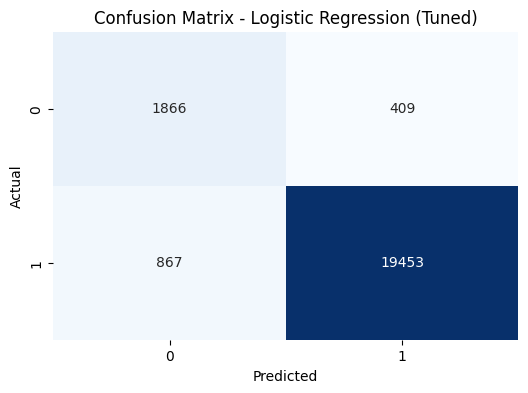


Confusion Matrix - XGBoost (Tuned):
[[ 1841   434]
 [    4 20316]]


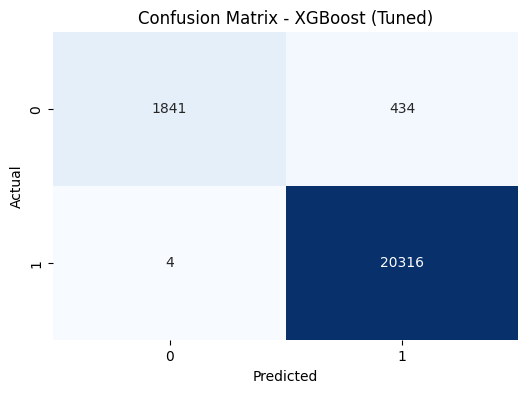


Confusion Matrix - Logistic Regression (Initial):
[[ 1834   441]
 [   11 20309]]


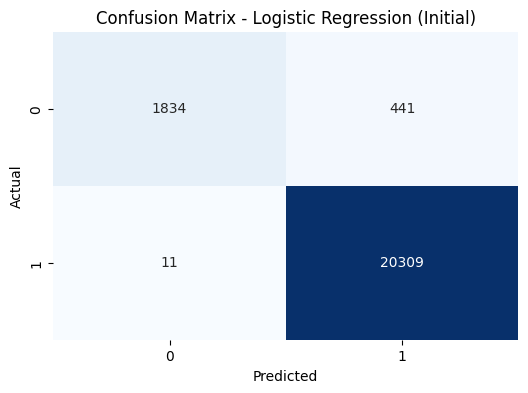


Confusion Matrix - XGBoost (Initial):
[[ 1834   441]
 [   11 20309]]


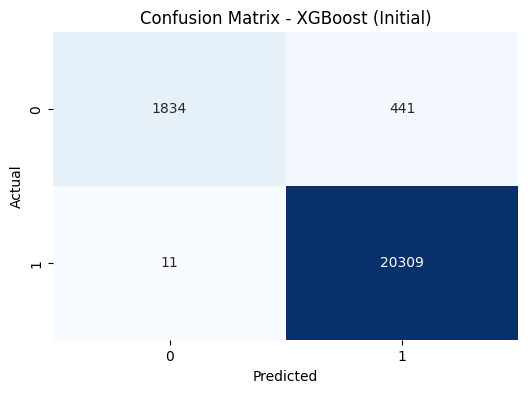

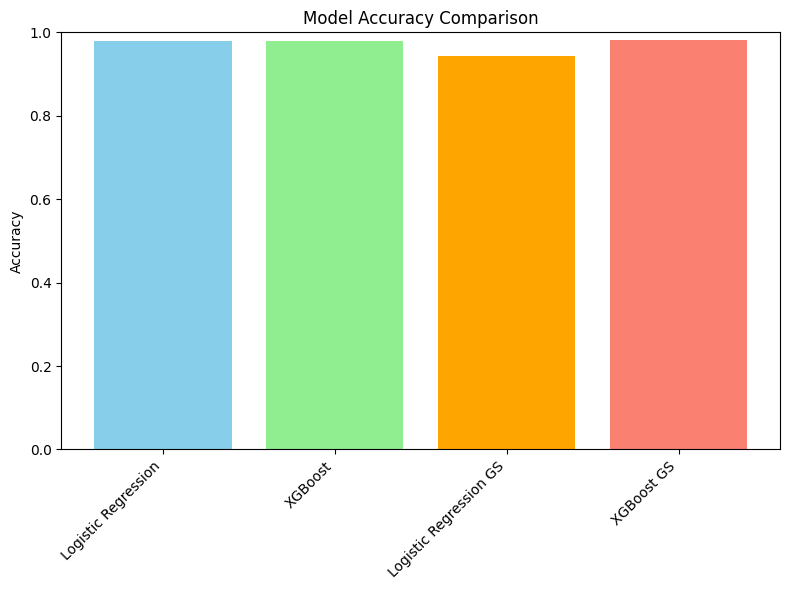

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Definisikan daftar dari model prediksi dan nama-nama mereka
# Pastikan variabel prediksi tersebut sesuai dengan output dari sell evaluasi model
model_predictions = [
    (y_test_pred_lr_gs, 'Logistic Regression GS'), # Menggunakan prediksi LR dituning
    (y_test_pred_xgb_gs, 'XGBoost GS'),           # Menggunakan prediksi XGB dituning
    (y_test_pred, 'Logistic Regression'),   # Menggunakan prediksi LR awal/asal
    (y_test_pred, 'XGBoost')                 # Menggunakan prediksi XGB awal/asal
]

# Lakukan loop/iterasi melalui prediksi dan plot confusion matrix
for predictions, model_name in model_predictions:
    # Membuat confusion metrik
    cm = confusion_matrix(y_test, predictions)
    print(f"\nConfusion Matrix - {model_name}:")
    print(cm)

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# --- Membandingkan akurasi (Mengasumsi akurasi variabel-variabel tersedia) ---
# Kamu akan membutuhkan untuk memastikan akurasi variabel (accuracy_test, accuracy_test_xgb, accuracy_test_lr_gs, accuracy_test_xgb_gs)
# Sel-sel dari evaluasi sebelumnya masih berada dalam namespace kernel.

# Buat sebuah chart bar untuk membandingkan akurasi
# Mendefinisikan nama models sebagai nilai x pada chart bar
models = ['Logistic Regression', 'XGBoost', 'Logistic Regression GS', 'XGBoost GS']
#
# Mendefinisikan nilai akurasi sebagai nilai y pada chart bar
# Pastikan variabel-variabel tersebut diisi dengan benar dari sel sebelumnya
accuracies = [accuracy_test, accuracy_test, accuracy_test_lr_gs, accuracy_test_xgb_gs] # Catatan: Pastikan bahwa accuracy_test dari LR awal digunakan.
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'orange', 'salmon'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1) # Atur y-axis batas dari 0 hingga 1 untuk accuracy
plt.xticks(rotation=45, ha='right') # Putar label untuk meningkatkan keterbacaan
plt.tight_layout() # Sesuaikan tata letak untuk mencegah label tumpang tindih.
plt.show()